<a href="https://colab.research.google.com/github/klcalvo-sketch/Diplomatura_DS_GrupoM/blob/main/Archivo_Final_Diplomatura_CDyAA_Proyecto_Final_Grupo_M_Cuaderno(COLAB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto Final: Modelo de Machine learning para predecir Alteración del Orden en el Sistema Penitenciario Argentino**

**Grupo M:**
Lucia Cortes,
María Fernanda Farias,
Favio Ruggieri,
Alejandro Gomez,
Sergio Salanitri,
Karina Calvo

### PreProcesamiento ya realizado sobre el csv original

In [ ]:

# 1. Mapeos ya implementado en: csv
# participo_alteracion_orden_ult_anio_id = {
#     0: "",
#     1: "SI - Alteración del orden con heridos o muertos",
#     2: "SI - Alteración del orden con rehenes",
#     3: "SI - Alteración del orden con daños",
#     4: "SI - Alteración del orden SIN heridos, ni rehenes",
#     5: "No participó de ninguna alteración"
# }

# participo_alteracion_orden_ult_anio_id_recodificado = {
#     0: "No Info",   #0
#     1: "No participó de ninguna alteración", #5
#     2: "SI - Alteración del orden leve" # 3,4
#     3: "SI -  Alteración del orden grave" # 1,2
# }

# nivel_instruccion_id_recodificado = {
#     0 : "",
#     1: 'Ninguno',
#     2: 'Primaria incompleta',
#     10:'Primaria incompleta',
#     11:'Primaria incompleta',
#     3: "Primeria completa",
#     13:"Primeria completa",
#     4: "Secundaria incompleta",
#     14:"Secundaria incompleta",
#     15:"Secundaria incompleta",
#     16:"Secundaria incompleta",
#     5: "Secundaria completa",
#     17:"Secundaria completa",
#     6: "Terciario o Universitario incompleto",
#     8: "Terciario o Universitario incompleto",
#     7: "Terciario o Universitario completo",
#     9: "Terciario o Universitario completo",
# }

# nacionalidad_id_recodificado = {

#     0: "",
#     1: "Argentino",  #1
#     2,17: "Entranjero" #2
# }

# estado_civil_id_recodificado = {
#     0 :"",
#     1 : "Soltero",
#     2: "Casado * Concubino",
#     6: "Casado * Concubino",
#     3: "Viudo",
#     4: "Separado / Divorciado",
#     5: "Separado / Divorciado",
# }

#2.Eliminación de columnas explicativas de las categorías (3)
# 'provincia_descripcion',
# 'establecimiento_descripcion',
# 'genero_descripcion',
# 'nacionalidad_descripcion',
# 'estado_civil_descripcion',
# 'nivel_instruccion_descripcion',
# 'ultima_situacion_laboral_descripcion',
# 'capacitacion_laboral_al_ingresar_descripcion',
# 'ultimo_lugar_residencia_descripcion',
# 'ultima_provincia_residencia_descripcion',
# 'jurisdiccion_descripcion',
# 'situacion_legal_descripcion',
# 'establecimiento_procedencia_descripcion',
# 'delito1_descripcion',
# 'delito2_descripcion',
# 'delito3_descripcion',
# 'delito4_descripcion',
# 'delito5_descripcion',
# 'horas_trabajo_remunerado_descripcion',
# 'participacion_programa_educativo_descripcion',
# 'recibio_atencion_medica_ult_anio_descripcion',
# 'participo_alteracion_orden_ult_anio_descripcion',
# 'tipo_infraccion_disciplinaria__descripcion',
# 'sancion_aplicada_descripcion',
# 'calificacion_conducta_descripcion',
# 'tentativa_fugas_evasiones_descripcion',
# 'fue_lesionado_descripcion',
# 'es_reincidente_descripcion',
# 'tiene_periodo_progresividad_descripcion',
# 'reparticion_descripcion',
# 'tuvo_salidas_transitorias_descripcion',
# 'incorporado_reg_semi_libertad_descripcion',
# 'participa_programa_prision_discontinua_descripcion',
# 'participa_programa_semi_detencion_descripcion',
# 'tuvo_reduccion_pena_descripcion'

s

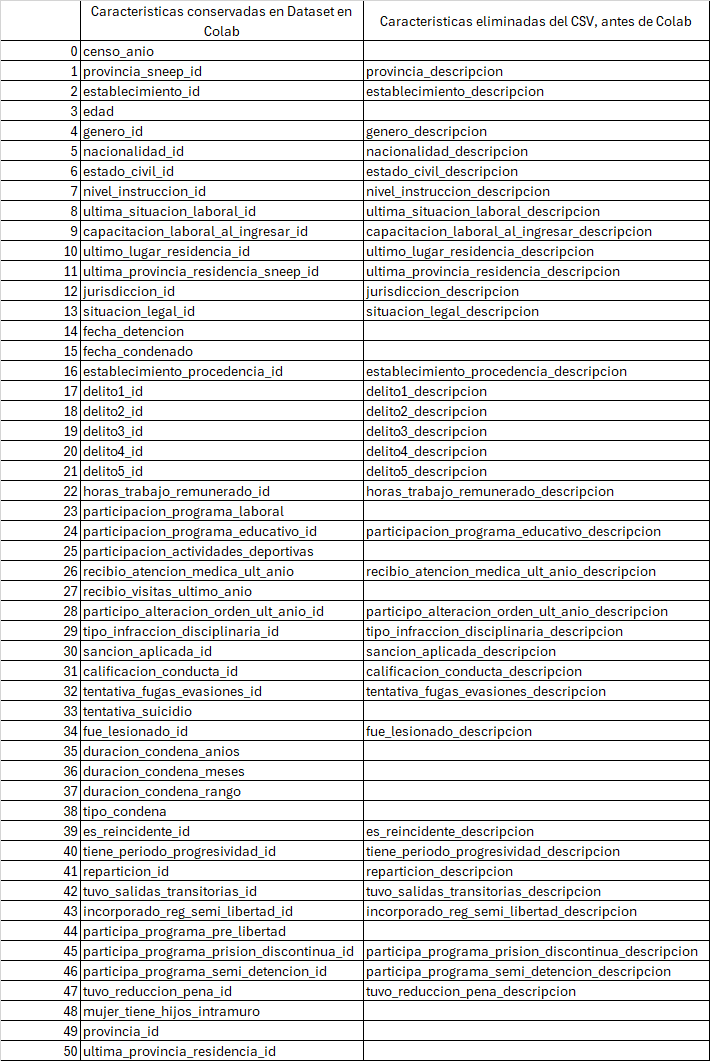

# Análisis Exploratorio de Datos

## Pre-procesamiento del Dataset


In [ ]:
# Intalación de librerias
!pip install missingno

In [ ]:
# Intalación de librerias
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 1. Cargar dataset
df=pd.read_csv("/content/sneep-unificado-procesado-completo-sin-descripcion-recodificado-fix-nacionalidad.csv", sep=',', low_memory=False)

In [ ]:
# 2. Info del dataset
df.shape

(1436508, 51)

In [ ]:
df.head()

,censo_anio,provincia_sneep_id,establecimiento_id,edad,genero_id,nacionalidad_id,estado_civil_id,nivel_instruccion_id,ultima_situacion_laboral_id,capacitacion_laboral_al_ingresar_id,...,reparticion_id,tuvo_salidas_transitorias_id,incorporado_reg_semi_libertad_id,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_semi_detencion_id,tuvo_reduccion_pena_id,mujer_tiene_hijos_intramuro,provincia_id,ultima_provincia_residencia_id
0,2002,24,89,28,1,1,0,4,0,0,...,3,0,0,NaN,0,0,0,NaN,2,6.0
1,2002,24,89,32,1,1,0,3,0,0,...,3,0,0,NaN,0,0,0,NaN,2,2.0
2,2007,12,180,0,2,0,0,0,0,0,...,1,0,0,NaN,0,0,0,f,50,NaN
3,2002,20,151,25,1,1,2,2,2,3,...,1,0,0,NaN,0,0,0,NaN,82,82.0
4,2002,20,151,32,1,1,2,2,3,2,...,1,0,0,NaN,0,0,0,NaN,82,82.0


In [ ]:
df.tail()

,censo_anio,provincia_sneep_id,establecimiento_id,edad,genero_id,nacionalidad_id,estado_civil_id,nivel_instruccion_id,ultima_situacion_laboral_id,capacitacion_laboral_al_ingresar_id,...,reparticion_id,tuvo_salidas_transitorias_id,incorporado_reg_semi_libertad_id,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_semi_detencion_id,tuvo_reduccion_pena_id,mujer_tiene_hijos_intramuro,provincia_id,ultima_provincia_residencia_id
1436503,2002,24,89,34,1,1,0,2,0,0,...,3,0,0,NaN,0,0,0,NaN,2,6.0
1436504,2002,24,89,38,1,1,0,0,0,0,...,3,0,0,NaN,0,0,0,NaN,2,6.0
1436505,2003,24,89,32,1,1,2,0,0,0,...,3,0,0,NaN,0,0,0,NaN,2,2.0
1436506,2002,24,89,25,1,1,0,4,0,0,...,3,0,0,NaN,0,0,0,NaN,2,2.0
1436507,2003,24,89,37,1,1,0,0,0,0,...,3,0,0,NaN,0,0,0,NaN,2,6.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436508 entries, 0 to 1436507
Data columns (total 51 columns):
 #   Column                                     Non-Null Count    Dtype  
---  ------                                     --------------    -----  
 0   censo_anio                                 1436508 non-null  int64  
 1   provincia_sneep_id                         1436508 non-null  int64  
 2   establecimiento_id                         1436508 non-null  int64  
 3   edad                                       1436508 non-null  int64  
 4   genero_id                                  1436508 non-null  int64  
 5   nacionalidad_id                            1436508 non-null  int64  
 6   estado_civil_id                            1436508 non-null  int64  
 7   nivel_instruccion_id                       1436508 non-null  int64  
 8   ultima_situacion_laboral_id                1436508 non-null  int64  
 9   capacitacion_laboral_al_ingresar_id        1436508 non-null  int64  

In [ ]:
# Display the names of all columns
print("Nombre de las variables del dataset:")
display(df.columns.tolist())

Nombre de las variables del dataset:


['censo_anio',
 'provincia_sneep_id',
 'establecimiento_id',
 'edad',
 'genero_id',
 'nacionalidad_id',
 'estado_civil_id',
 'nivel_instruccion_id',
 'ultima_situacion_laboral_id',
 'capacitacion_laboral_al_ingresar_id',
 'ultimo_lugar_residencia_id',
 'ultima_provincia_residencia_sneep_id',
 'jurisdiccion_id',
 'situacion_legal_id',
 'fecha_detencion',
 'fecha_condenado',
 'establecimiento_procedencia_id',
 'delito1_id',
 'delito2_id',
 'delito3_id',
 'delito4_id',
 'delito5_id',
 'horas_trabajo_remunerado_id',
 'participacion_programa_laboral',
 'participacion_programa_educativo_id',
 'participacion_actividades_deportivas',
 'recibio_atencion_medica_ult_anio',
 'recibio_visitas_ultimo_anio',
 'participo_alteracion_orden_ult_anio_id',
 'tipo_infraccion_disciplinaria_id',
 'sancion_aplicada_id',
 'calificacion_conducta_id',
 'tentativa_fugas_evasiones_id',
 'tentativa_suicidio',
 'fue_lesionado_id',
 'duracion_condena_anios',
 'duracion_condena_meses',
 'duracion_condena_rango',
 'tipo

In [ ]:
for column in df.columns:
    num_unique_values = df[column].nunique()
    print(f'Number of unique values in {column}: {num_unique_values}')

Number of unique values in censo_anio: 21
Number of unique values in provincia_sneep_id: 24
Number of unique values in establecimiento_id: 430
Number of unique values in edad: 85
Number of unique values in genero_id: 5
Number of unique values in nacionalidad_id: 2
Number of unique values in estado_civil_id: 3
Number of unique values in nivel_instruccion_id: 7
Number of unique values in ultima_situacion_laboral_id: 4
Number of unique values in capacitacion_laboral_al_ingresar_id: 4
Number of unique values in ultimo_lugar_residencia_id: 3
Number of unique values in ultima_provincia_residencia_sneep_id: 25
Number of unique values in jurisdiccion_id: 27
Number of unique values in situacion_legal_id: 5
Number of unique values in fecha_detencion: 11866
Number of unique values in fecha_condenado: 13398
Number of unique values in establecimiento_procedencia_id: 5
Number of unique values in delito1_id: 32
Number of unique values in delito2_id: 31
Number of unique values in delito3_id: 31
Number

In [ ]:
# Eliminacion de Categorías no relevantes al problema de estudio
# Create a copy of the DataFrame
df_modified = df.copy()

# List of columns to drop
columns_to_drop = [
    'ultimo_lugar_residencia_id',
    'ultima_provincia_residencia_sneep_id',
    'jurisdiccion_id',
    'fecha_detencion',
    'fecha_condenado',
    'establecimiento_procedencia_id',
    'sancion_aplicada_id',
    'duracion_condena_meses',
    'duracion_condena_rango',
    'reparticion_id',
    'mujer_tiene_hijos_intramuro',
    'provincia_id',
    'ultima_provincia_residencia_id'
]

# Drop the specified columns
df_modified = df_modified.drop(columns=columns_to_drop, errors='ignore')

# Display the first few rows of the modified DataFrame
display(df_modified.head())

# Display the information of the modified DataFrame to check for dropped columns
display(df_modified.info())

,censo_anio,provincia_sneep_id,establecimiento_id,edad,genero_id,nacionalidad_id,estado_civil_id,nivel_instruccion_id,ultima_situacion_laboral_id,capacitacion_laboral_al_ingresar_id,...,duracion_condena_anios,tipo_condena,es_reincidente_id,tiene_periodo_progresividad_id,tuvo_salidas_transitorias_id,incorporado_reg_semi_libertad_id,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_semi_detencion_id,tuvo_reduccion_pena_id
0,2002,24,89,28,1,1,0,4,0,0,...,0,NaN,0,0,0,0,NaN,0,0,0
1,2002,24,89,32,1,1,0,3,0,0,...,0,NaN,0,0,0,0,NaN,0,0,0
2,2007,12,180,0,2,0,0,0,0,0,...,0,NaN,0,0,0,0,NaN,0,0,0
3,2002,20,151,25,1,1,2,2,2,3,...,0,NaN,0,0,0,0,NaN,0,0,0
4,2002,20,151,32,1,1,2,2,3,2,...,0,NaN,0,0,0,0,NaN,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436508 entries, 0 to 1436507
Data columns (total 38 columns):
 #   Column                                     Non-Null Count    Dtype  
---  ------                                     --------------    -----  
 0   censo_anio                                 1436508 non-null  int64  
 1   provincia_sneep_id                         1436508 non-null  int64  
 2   establecimiento_id                         1436508 non-null  int64  
 3   edad                                       1436508 non-null  int64  
 4   genero_id                                  1436508 non-null  int64  
 5   nacionalidad_id                            1436508 non-null  int64  
 6   estado_civil_id                            1436508 non-null  int64  
 7   nivel_instruccion_id                       1436508 non-null  int64  
 8   ultima_situacion_laboral_id                1436508 non-null  int64  
 9   capacitacion_laboral_al_ingresar_id        1436508 non-null  int64  

None

In [ ]:
df_modified.head()


,censo_anio,provincia_sneep_id,establecimiento_id,edad,genero_id,nacionalidad_id,estado_civil_id,nivel_instruccion_id,ultima_situacion_laboral_id,capacitacion_laboral_al_ingresar_id,...,duracion_condena_anios,tipo_condena,es_reincidente_id,tiene_periodo_progresividad_id,tuvo_salidas_transitorias_id,incorporado_reg_semi_libertad_id,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_semi_detencion_id,tuvo_reduccion_pena_id
0,2002,24,89,28,1,1,0,4,0,0,...,0,NaN,0,0,0,0,NaN,0,0,0
1,2002,24,89,32,1,1,0,3,0,0,...,0,NaN,0,0,0,0,NaN,0,0,0
2,2007,12,180,0,2,0,0,0,0,0,...,0,NaN,0,0,0,0,NaN,0,0,0
3,2002,20,151,25,1,1,2,2,2,3,...,0,NaN,0,0,0,0,NaN,0,0,0
4,2002,20,151,32,1,1,2,2,3,2,...,0,NaN,0,0,0,0,NaN,0,0,0


In [ ]:
# 4. Limpieza de datos
df_modified.isnull().sum()


,0
censo_anio,0
provincia_sneep_id,0
establecimiento_id,0
edad,0
genero_id,0
nacionalidad_id,0
estado_civil_id,0
nivel_instruccion_id,0
ultima_situacion_laboral_id,0
capacitacion_laboral_al_ingresar_id,0


In [ ]:
# Display the names of all columns
print("Nombre de las variables del dataset:")
display(df_modified.columns.tolist())

Nombre de las variables del dataset:


['censo_anio',
 'provincia_sneep_id',
 'establecimiento_id',
 'edad',
 'genero_id',
 'nacionalidad_id',
 'estado_civil_id',
 'nivel_instruccion_id',
 'ultima_situacion_laboral_id',
 'capacitacion_laboral_al_ingresar_id',
 'situacion_legal_id',
 'delito1_id',
 'delito2_id',
 'delito3_id',
 'delito4_id',
 'delito5_id',
 'horas_trabajo_remunerado_id',
 'participacion_programa_laboral',
 'participacion_programa_educativo_id',
 'participacion_actividades_deportivas',
 'recibio_atencion_medica_ult_anio',
 'recibio_visitas_ultimo_anio',
 'participo_alteracion_orden_ult_anio_id',
 'tipo_infraccion_disciplinaria_id',
 'calificacion_conducta_id',
 'tentativa_fugas_evasiones_id',
 'tentativa_suicidio',
 'fue_lesionado_id',
 'duracion_condena_anios',
 'tipo_condena',
 'es_reincidente_id',
 'tiene_periodo_progresividad_id',
 'tuvo_salidas_transitorias_id',
 'incorporado_reg_semi_libertad_id',
 'participa_programa_pre_libertad',
 'participa_programa_prision_discontinua_id',
 'participa_programa_semi

In [ ]:
# Remove duplicate rows and update df_modified
initial_rows = df_modified.shape[0]
df_modified.drop_duplicates(inplace=True)
rows_after_dropping = df_modified.shape[0]
num_duplicates_dropped = initial_rows - rows_after_dropping

print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows after dropping duplicates: {rows_after_dropping}")
print(f"Number of duplicate rows dropped: {num_duplicates_dropped}")

display(df_modified.head())
display(df_modified.info())

Initial number of rows: 1436508
Number of rows after dropping duplicates: 1373714
Number of duplicate rows dropped: 62794


,censo_anio,provincia_sneep_id,establecimiento_id,edad,genero_id,nacionalidad_id,estado_civil_id,nivel_instruccion_id,ultima_situacion_laboral_id,capacitacion_laboral_al_ingresar_id,...,duracion_condena_anios,tipo_condena,es_reincidente_id,tiene_periodo_progresividad_id,tuvo_salidas_transitorias_id,incorporado_reg_semi_libertad_id,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_semi_detencion_id,tuvo_reduccion_pena_id
0,2002,24,89,28,1,1,0,4,0,0,...,0,NaN,0,0,0,0,NaN,0,0,0
1,2002,24,89,32,1,1,0,3,0,0,...,0,NaN,0,0,0,0,NaN,0,0,0
2,2007,12,180,0,2,0,0,0,0,0,...,0,NaN,0,0,0,0,NaN,0,0,0
3,2002,20,151,25,1,1,2,2,2,3,...,0,NaN,0,0,0,0,NaN,0,0,0
4,2002,20,151,32,1,1,2,2,3,2,...,0,NaN,0,0,0,0,NaN,0,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 1373714 entries, 0 to 1436505
Data columns (total 38 columns):
 #   Column                                     Non-Null Count    Dtype  
---  ------                                     --------------    -----  
 0   censo_anio                                 1373714 non-null  int64  
 1   provincia_sneep_id                         1373714 non-null  int64  
 2   establecimiento_id                         1373714 non-null  int64  
 3   edad                                       1373714 non-null  int64  
 4   genero_id                                  1373714 non-null  int64  
 5   nacionalidad_id                            1373714 non-null  int64  
 6   estado_civil_id                            1373714 non-null  int64  
 7   nivel_instruccion_id                       1373714 non-null  int64  
 8   ultima_situacion_laboral_id                1373714 non-null  int64  
 9   capacitacion_laboral_al_ingresar_id        1373714 non-null  int64  
 10 

None

In [ ]:
df_modified.shape


(1373714, 38)

In [ ]:
# Display value counts and proportions of the target variable
print("Value counts of 'participo_alteracion_orden_ult_anio_id':")
display(df_modified['participo_alteracion_orden_ult_anio_id'].value_counts())

print("\nProportions of 'participo_alteracion_orden_ult_anio_id':")
display(df_modified['participo_alteracion_orden_ult_anio_id'].value_counts(normalize=True))

Value counts of 'participo_alteracion_orden_ult_anio_id':


,count
participo_alteracion_orden_ult_anio_id,
1,1075065
2,178860
0,72280
3,47509



Proportions of 'participo_alteracion_orden_ult_anio_id':


,proportion
participo_alteracion_orden_ult_anio_id,
1,0.782597
2,0.130202
0,0.052616
3,0.034584


In [ ]:
# Filter out rows where 'participo_alteracion_orden_ult_anio_id' is 0
df_filtered = df_modified[df_modified['participo_alteracion_orden_ult_anio_id'] != 0].copy()

# Display the shape of the filtered DataFrame
print("Shape of the DataFrame after removing category 0:", df_filtered.shape)

# Display the value counts of the target variable in the filtered DataFrame
print("\nValue counts of 'participo_alteracion_orden_ult_anio_id' after filtering:")
display(df_filtered['participo_alteracion_orden_ult_anio_id'].value_counts())

print("\nProportions of 'participo_alteracion_orden_ult_anio_id' after filtering:")
display(df_filtered['participo_alteracion_orden_ult_anio_id'].value_counts(normalize=True))

Shape of the DataFrame after removing category 0: (1301434, 38)

Value counts of 'participo_alteracion_orden_ult_anio_id' after filtering:


,count
participo_alteracion_orden_ult_anio_id,
1,1075065
2,178860
3,47509



Proportions of 'participo_alteracion_orden_ult_anio_id' after filtering:


,proportion
participo_alteracion_orden_ult_anio_id,
1,0.826062
2,0.137433
3,0.036505


In [ ]:
# Tratamiento de valores faltantes:
# Replace null values with 0 in df_filtered
df_filtered.fillna(0, inplace=True)

# Verify that there are no more null values
print("Missing values after filling with 0:")
display(df_filtered.isnull().sum().sum())

Missing values after filling with 0:


np.int64(0)

Se reemplaza los valores faltantes por 0 porque en el dataset original los campos vacios de las categorías eran codificados como 0, las características que tienen valores faltantes no corresponden a la variable participo_alteracion_orden_ult_anio_id que es la que vamos a llamar target

In [ ]:
# Comprobación que se reemplazaron los valores faltantes por 0
df_filtered.isnull().sum()

,0
censo_anio,0
provincia_sneep_id,0
establecimiento_id,0
edad,0
genero_id,0
nacionalidad_id,0
estado_civil_id,0
nivel_instruccion_id,0
ultima_situacion_laboral_id,0
capacitacion_laboral_al_ingresar_id,0


### Se decidió eliminar las columnas tipo_condena y participa_programa_pre_libertad debido a que mas del 50% de los datos eran campos vacíos

In [ ]:
# Drop the specified columns from df_filtered
columns_to_drop = ['tipo_condena', 'participa_programa_pre_libertad']
df_filtered = df_filtered.drop(columns=columns_to_drop, errors='ignore')

# Display the information of the modified DataFrame to check for dropped columns
display(df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1301434 entries, 0 to 1436505
Data columns (total 36 columns):
 #   Column                                     Non-Null Count    Dtype 
---  ------                                     --------------    ----- 
 0   censo_anio                                 1301434 non-null  int64 
 1   provincia_sneep_id                         1301434 non-null  int64 
 2   establecimiento_id                         1301434 non-null  int64 
 3   edad                                       1301434 non-null  int64 
 4   genero_id                                  1301434 non-null  int64 
 5   nacionalidad_id                            1301434 non-null  int64 
 6   estado_civil_id                            1301434 non-null  int64 
 7   nivel_instruccion_id                       1301434 non-null  int64 
 8   ultima_situacion_laboral_id                1301434 non-null  int64 
 9   capacitacion_laboral_al_ingresar_id        1301434 non-null  int64 
 10  situacion_l

None

In [ ]:
# Download the filtered DataFrame
df_filtered.to_csv('sneep-unificado-procesado-completo-sin-descripcion-recodificado_filtered.csv', index=False)
print("Filtered DataFrame saved as 'sneep-unificado-procesado-completo-sin-descripcion-recodificado_filtered.csv'")

Filtered DataFrame saved as 'sneep-unificado-procesado-completo-sin-descripcion-recodificado_filtered.csv'


In [ ]:
df_filtered.shape

(1301434, 36)

##Anális de frecuencia de cada variable en función del target

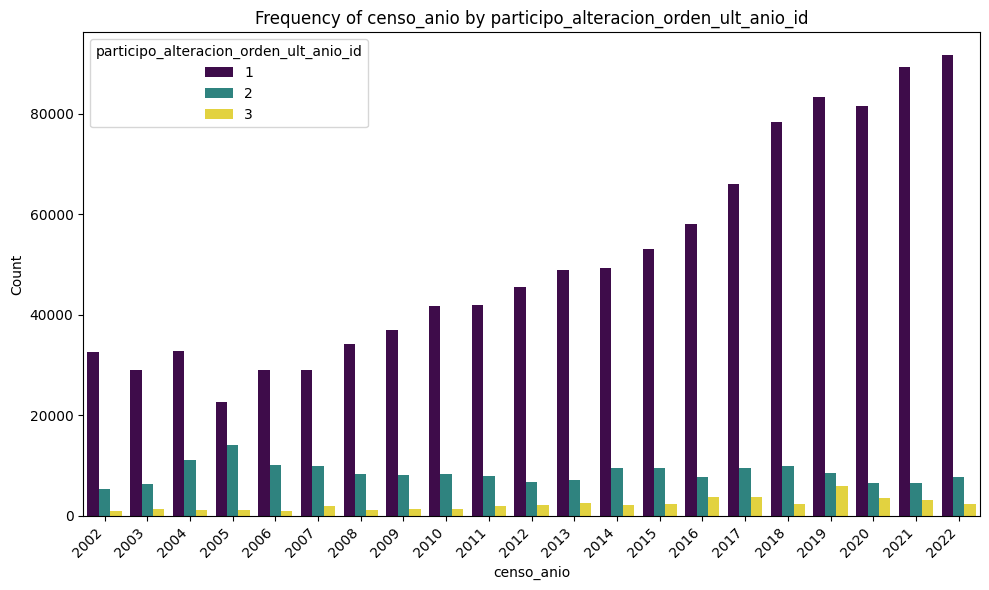

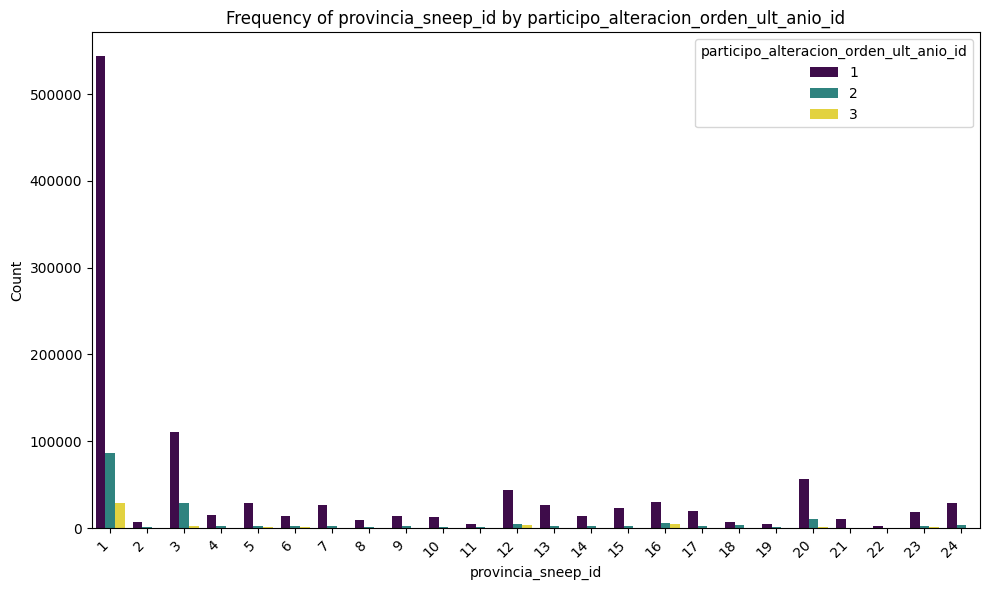

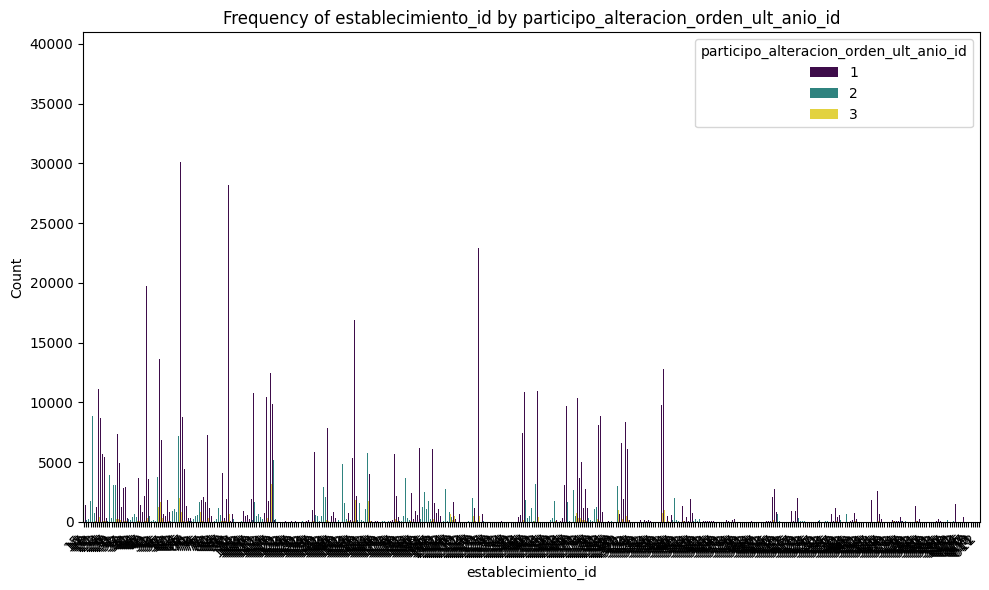

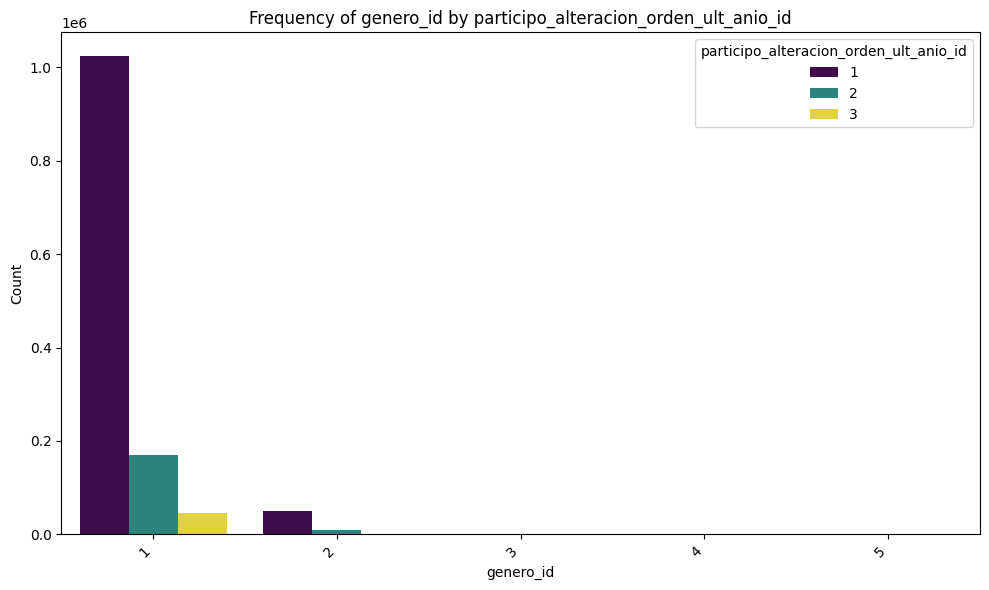

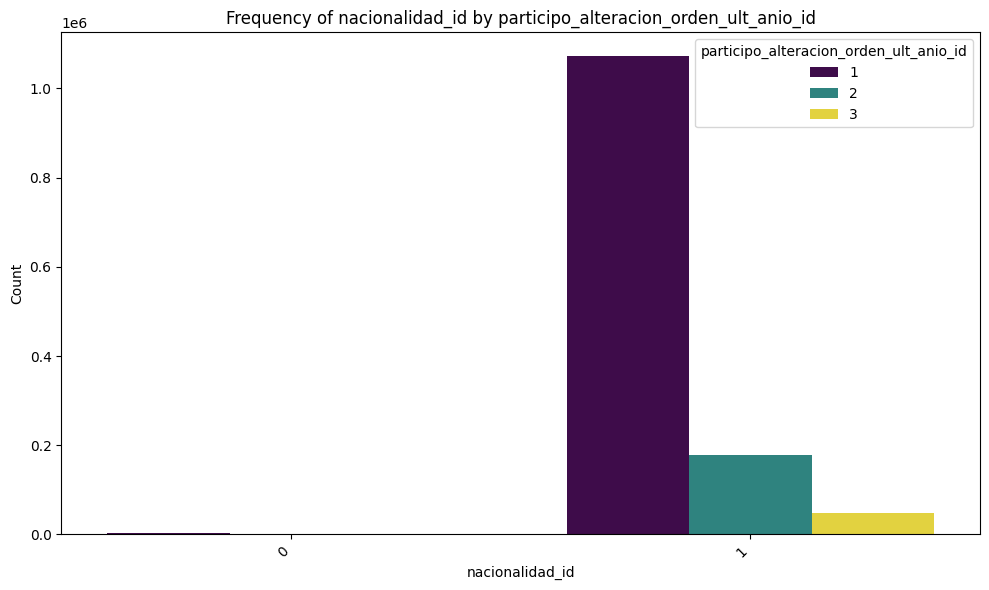

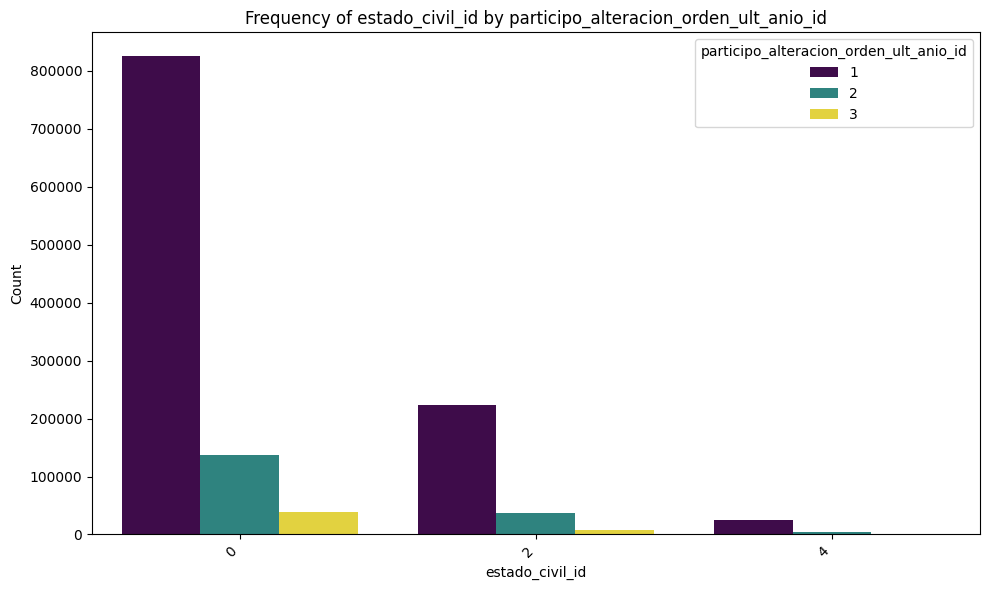

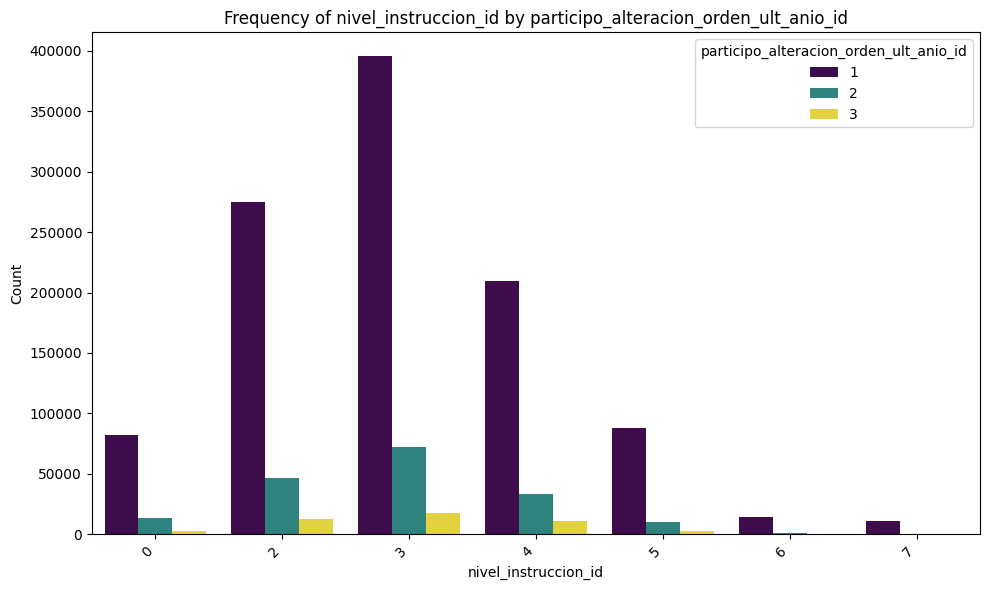

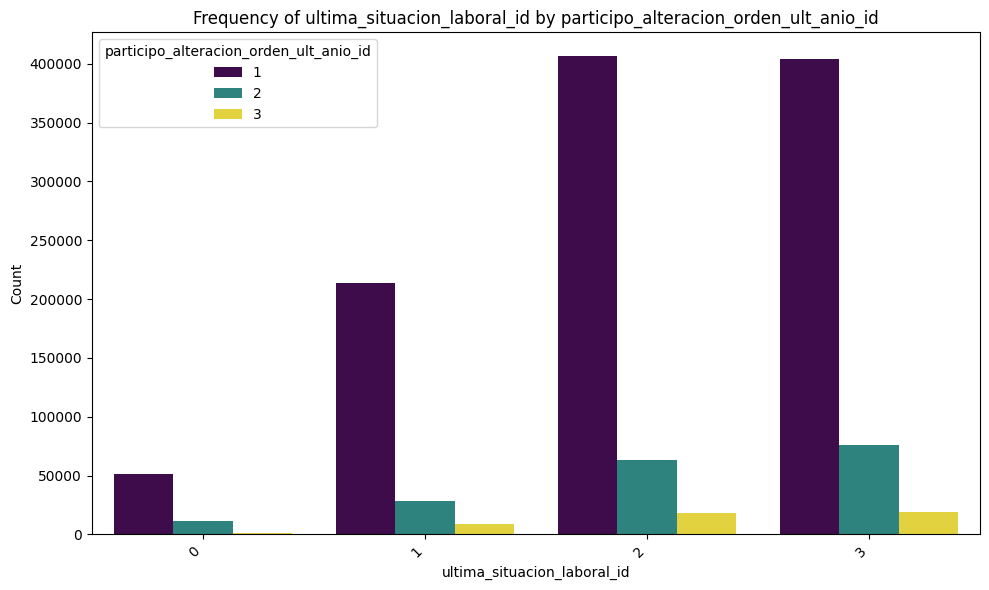

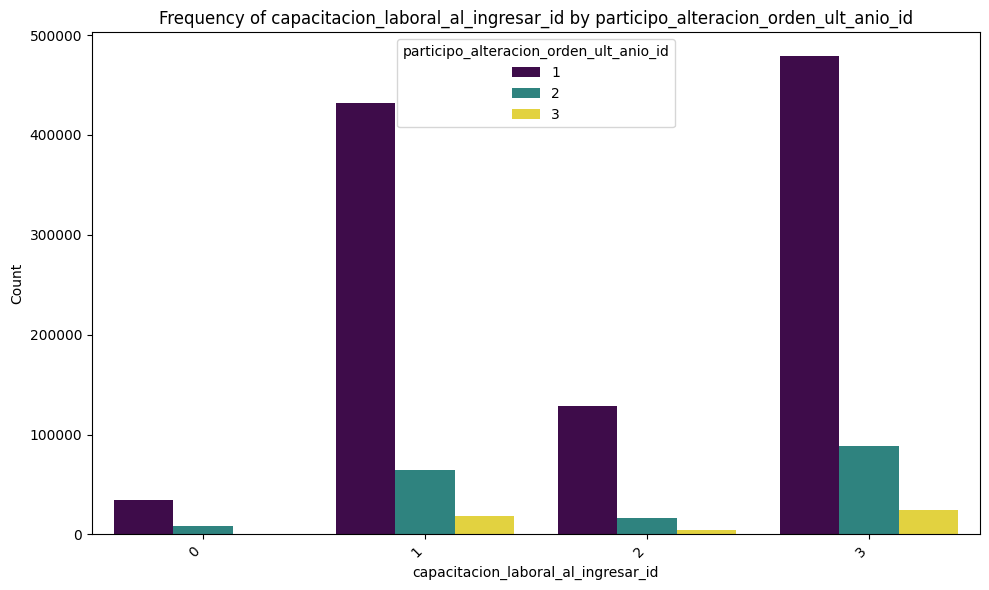

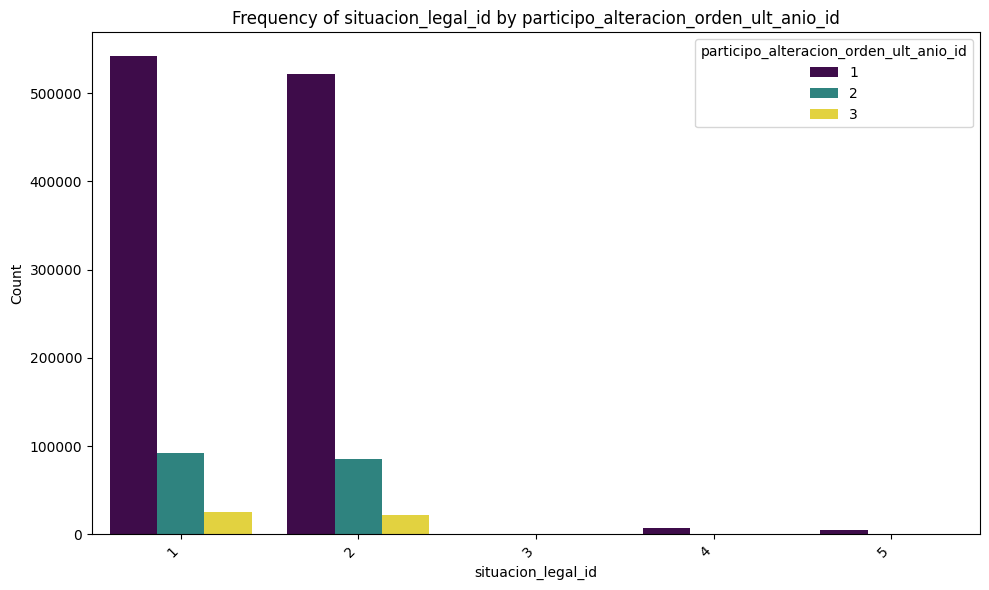

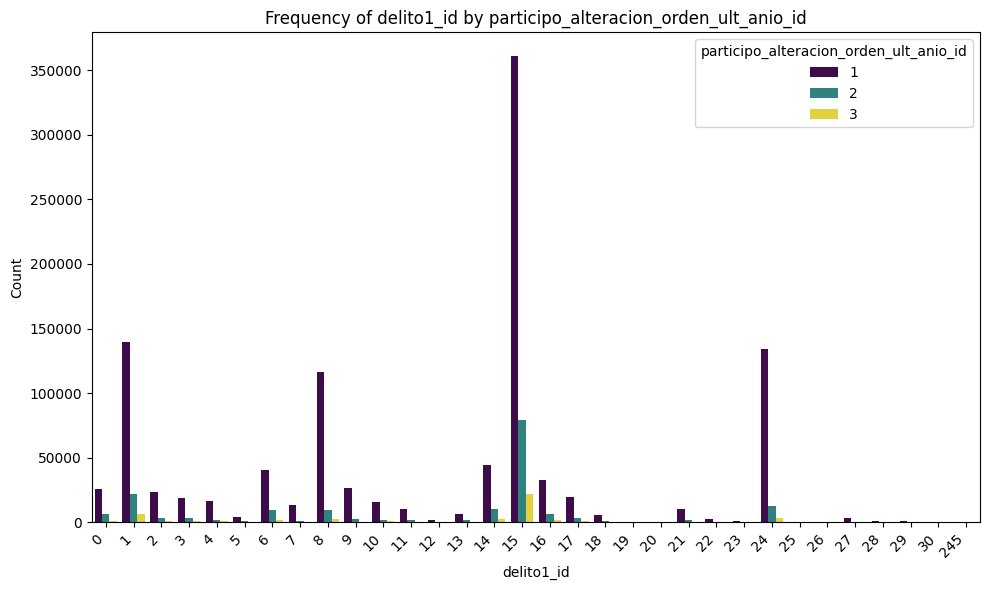

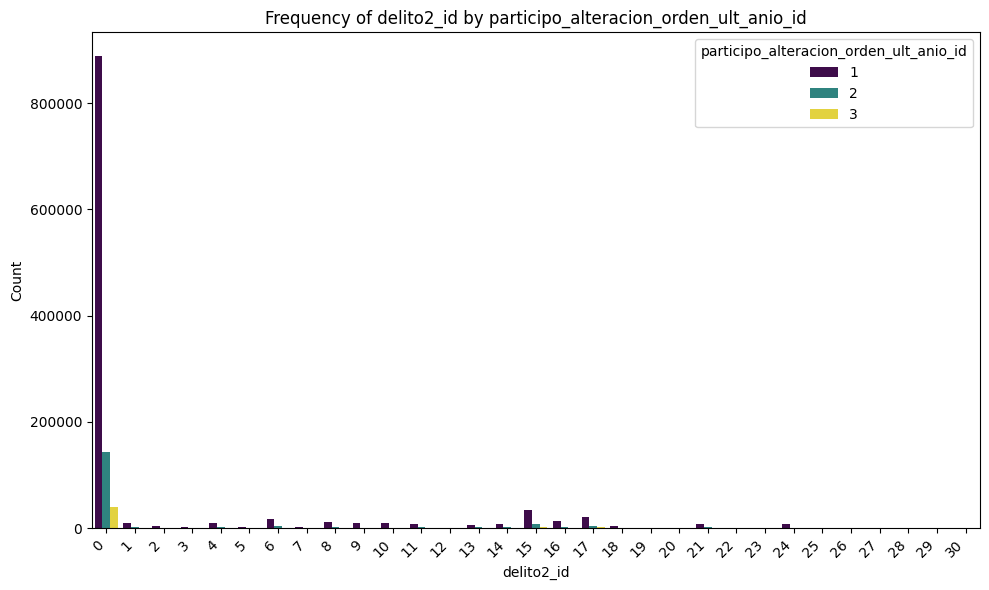

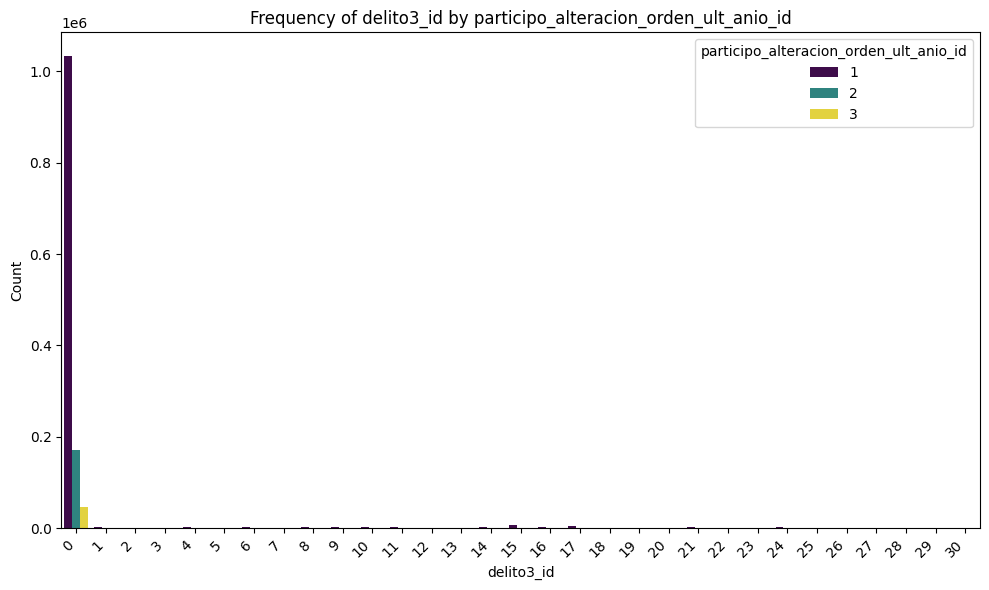

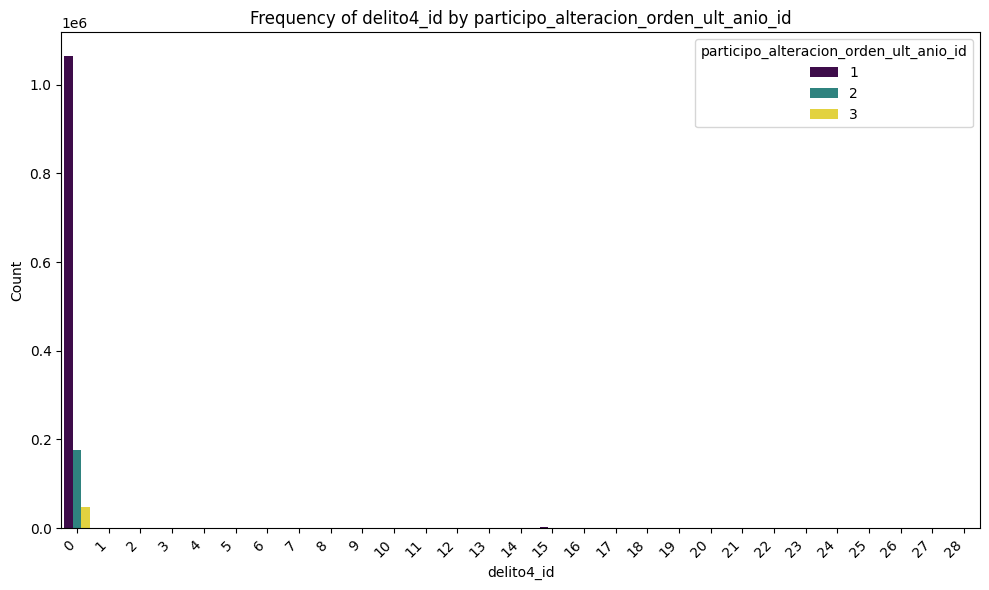

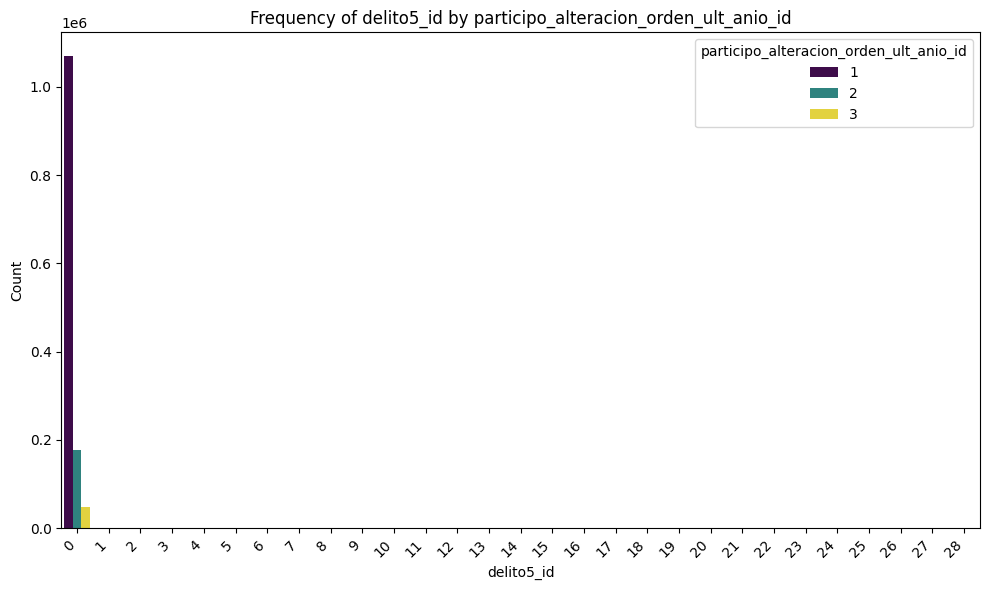

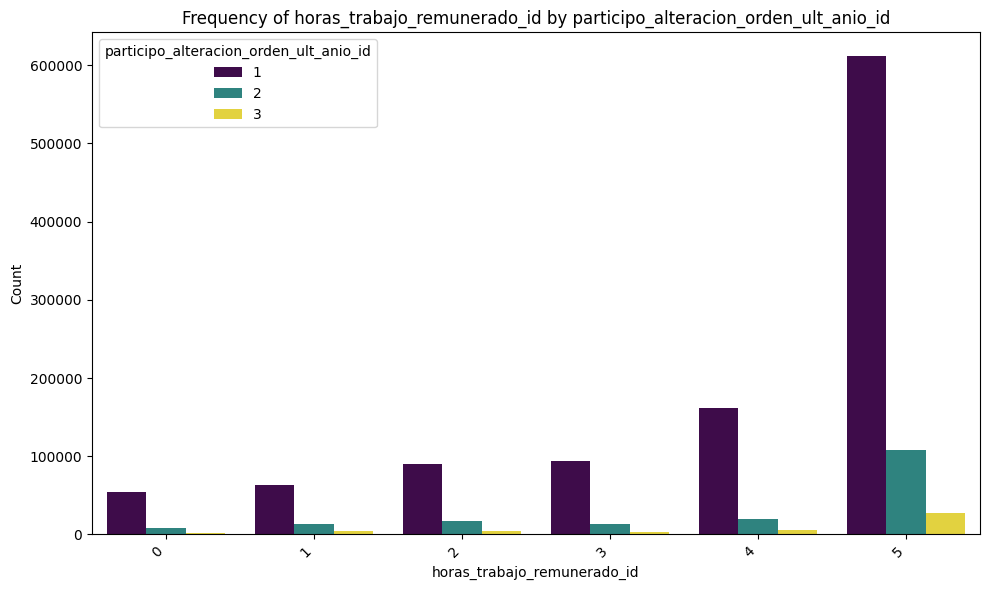

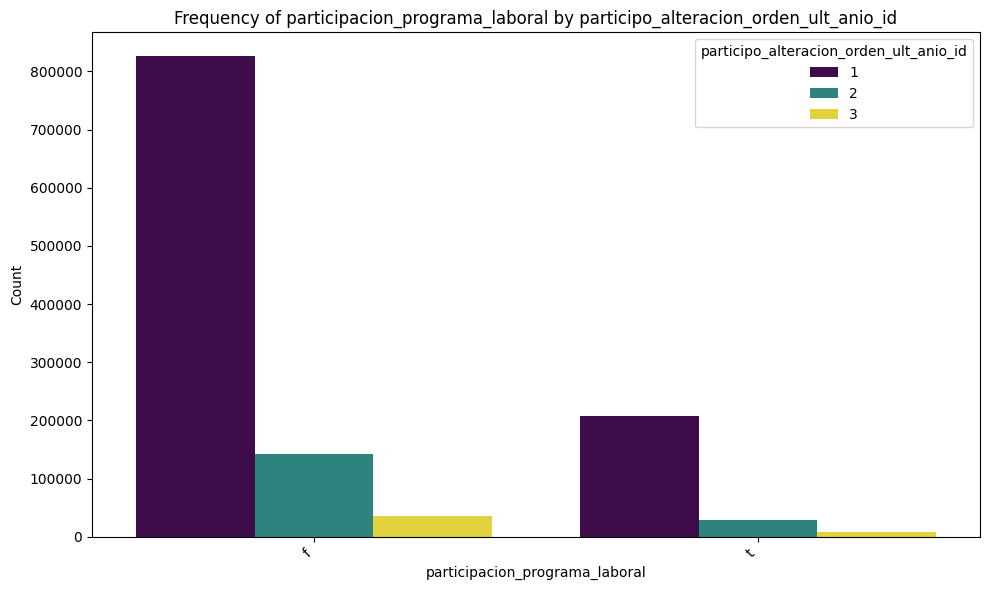

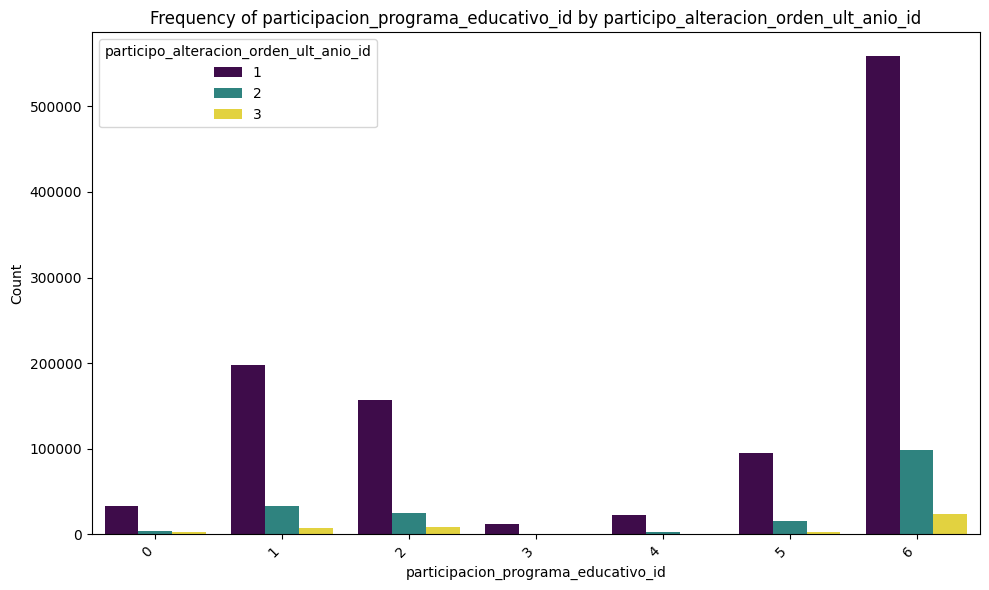

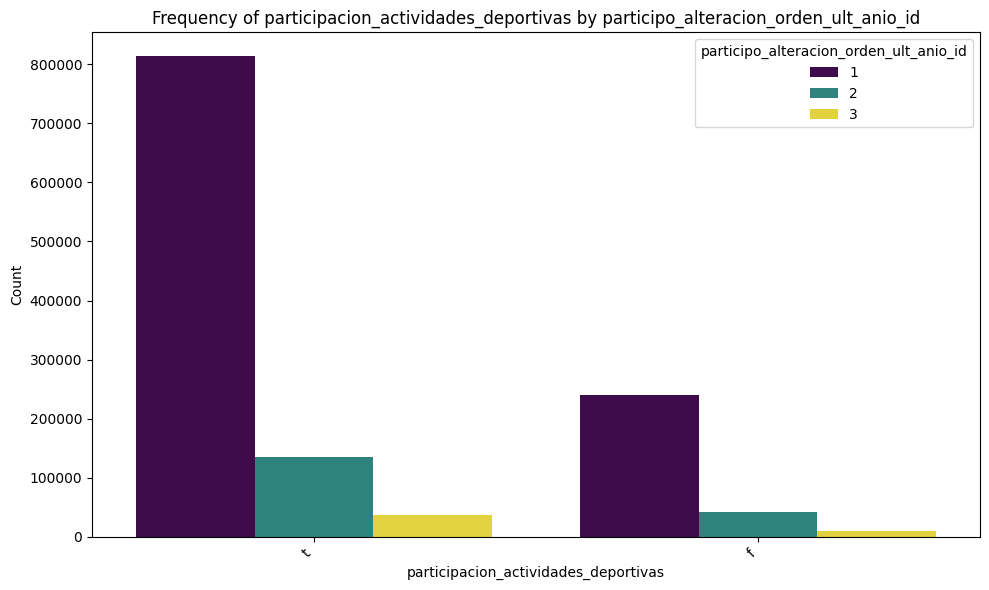

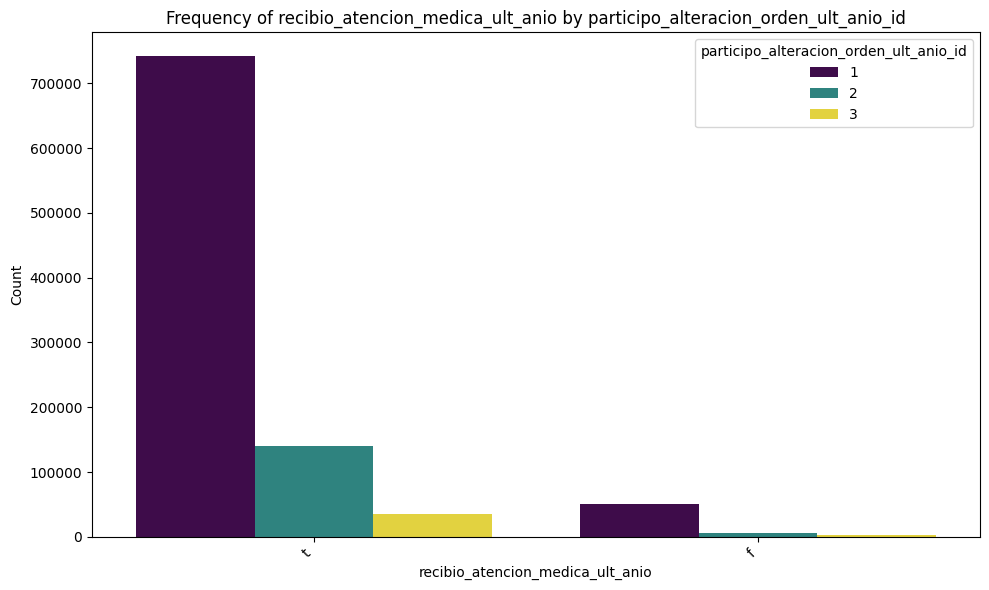

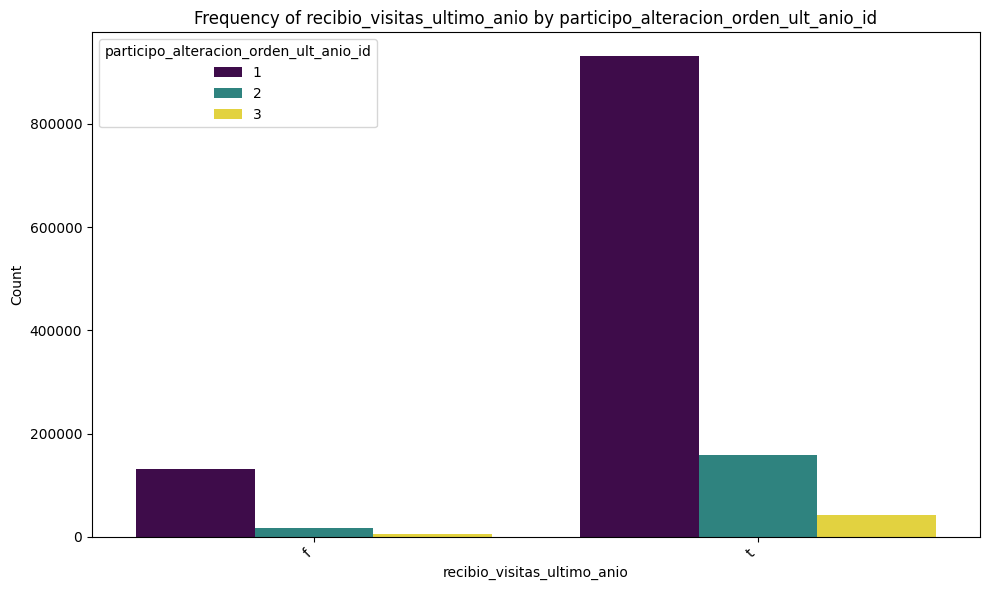

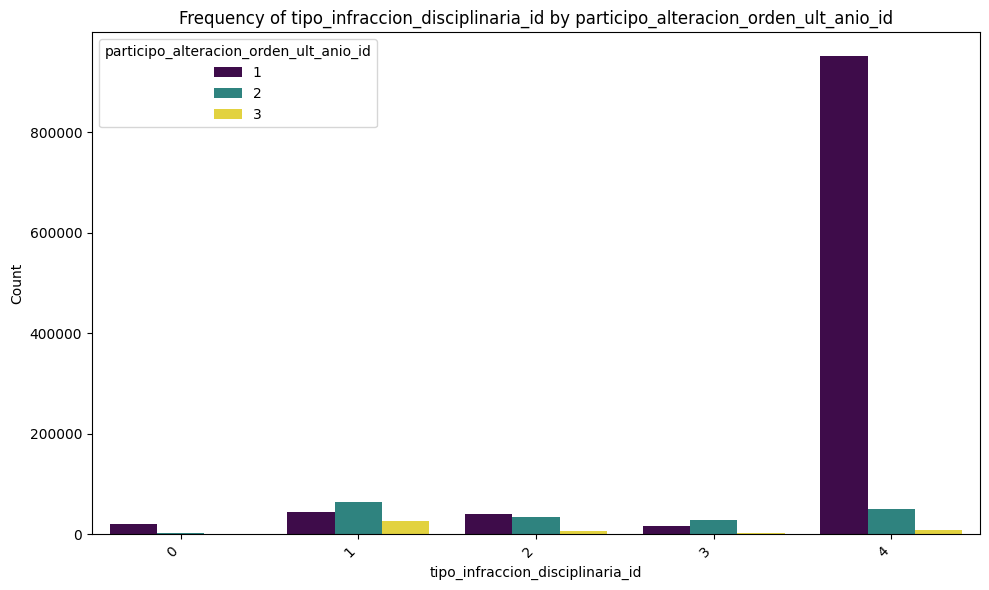

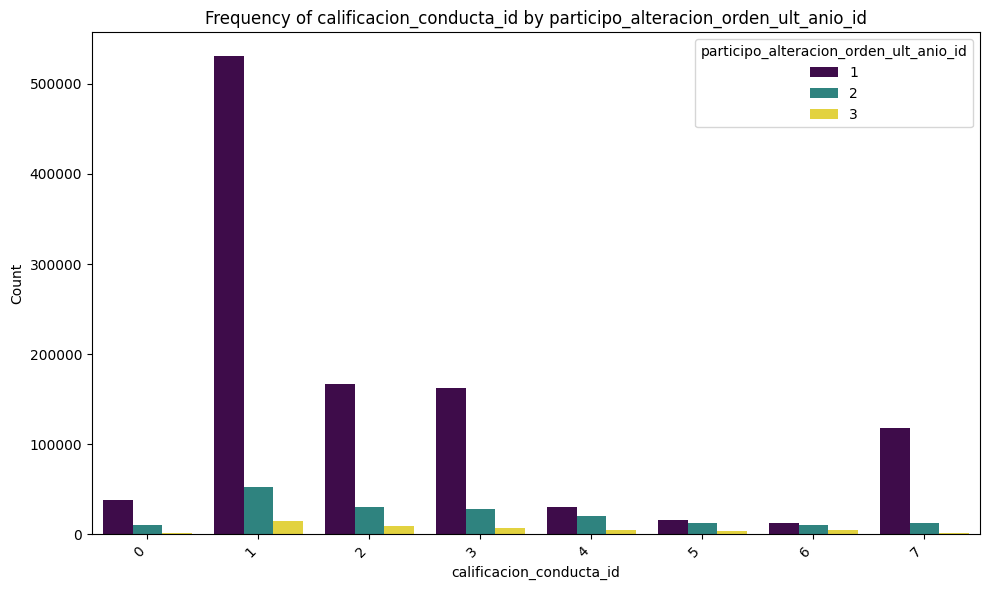

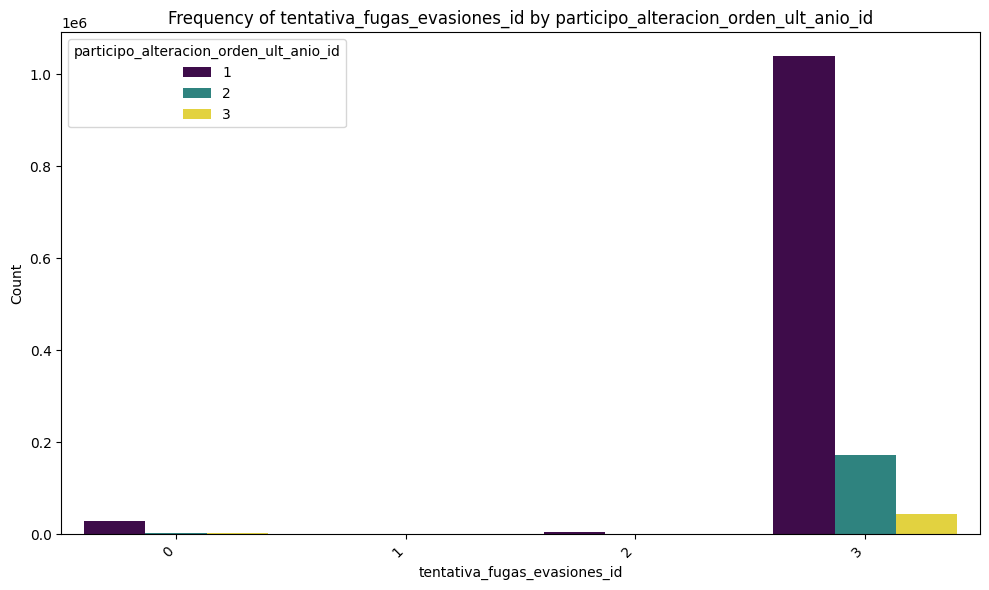

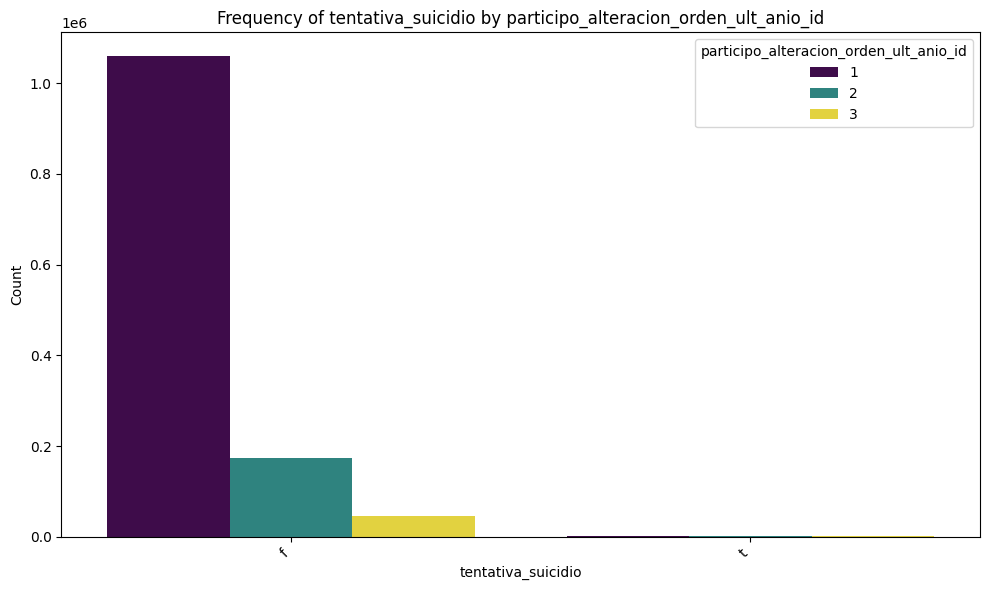

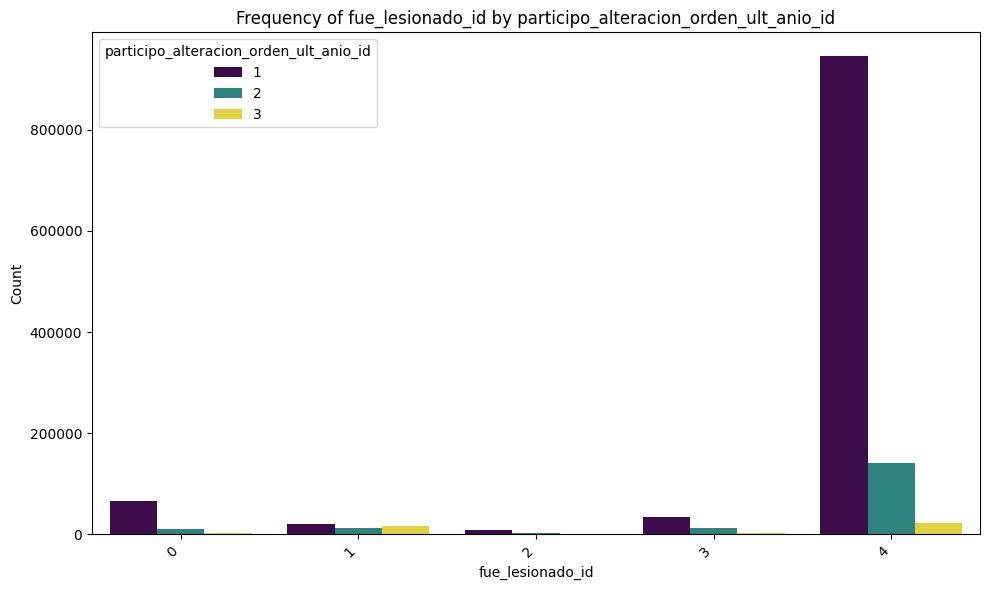

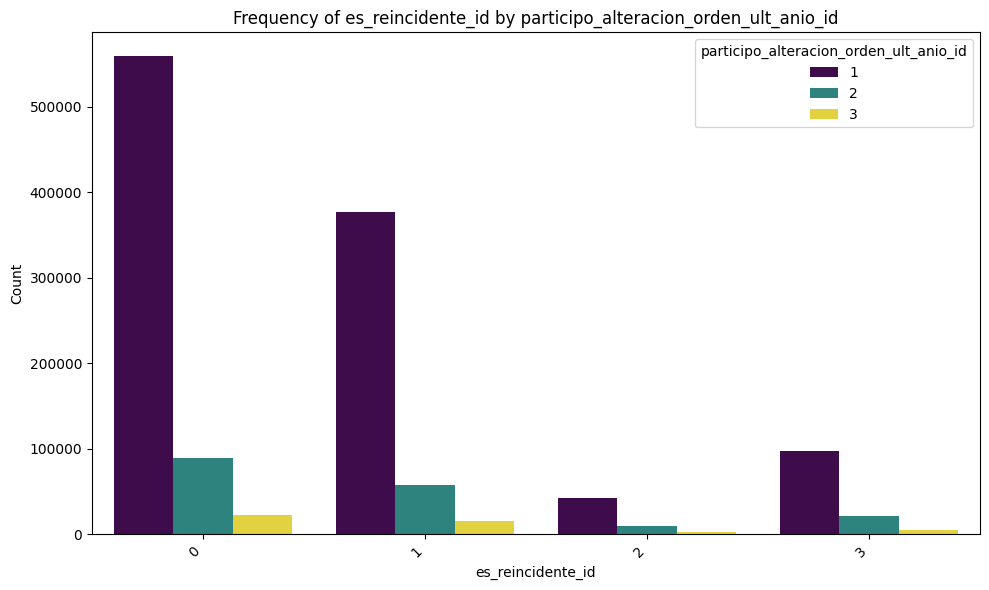

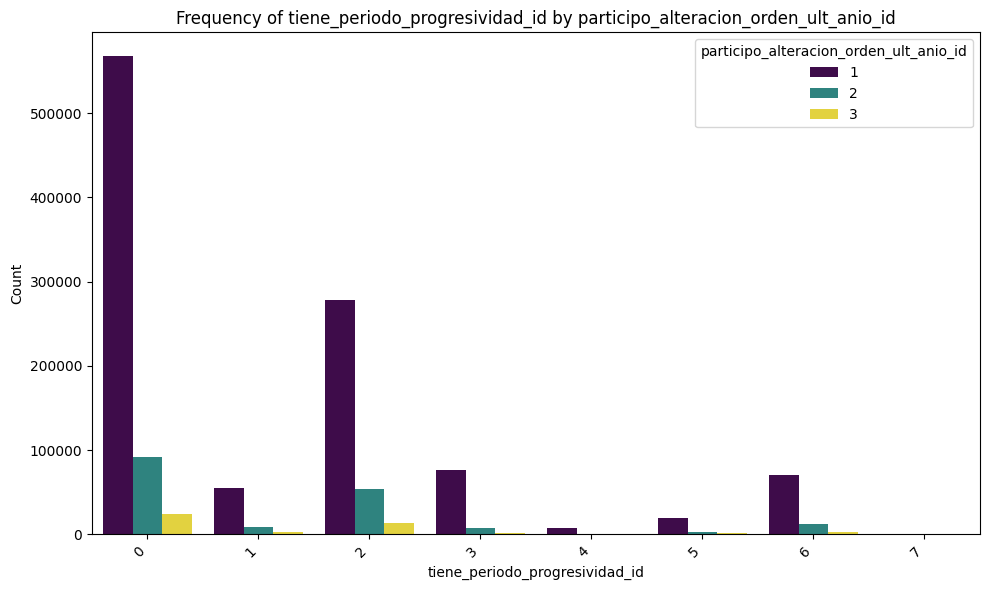

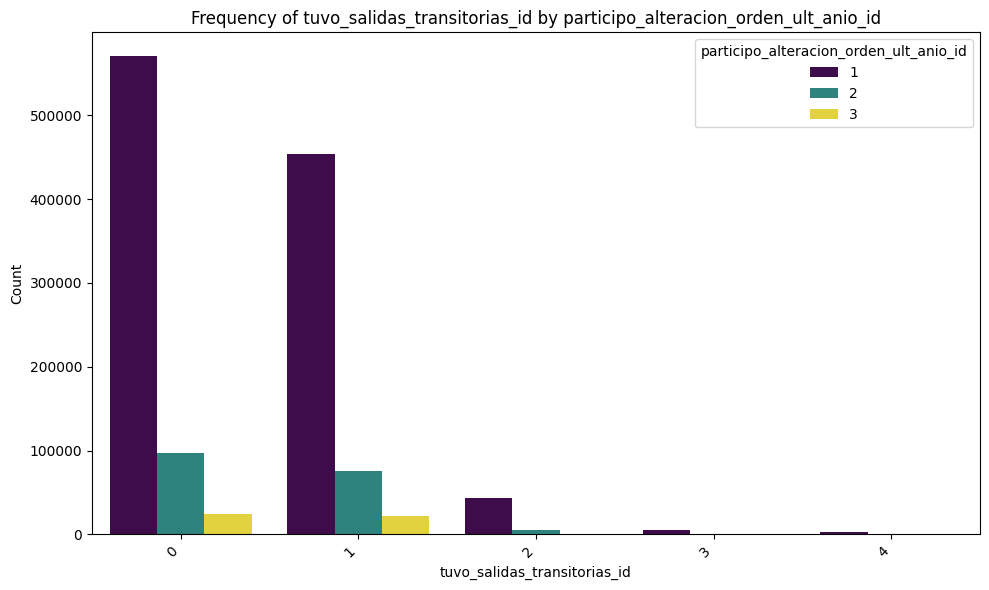

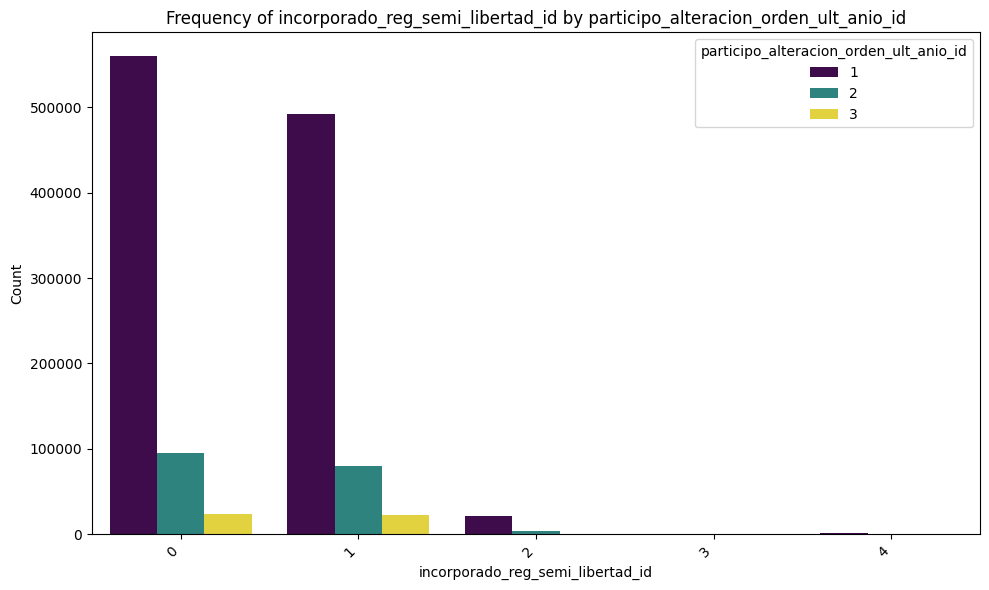

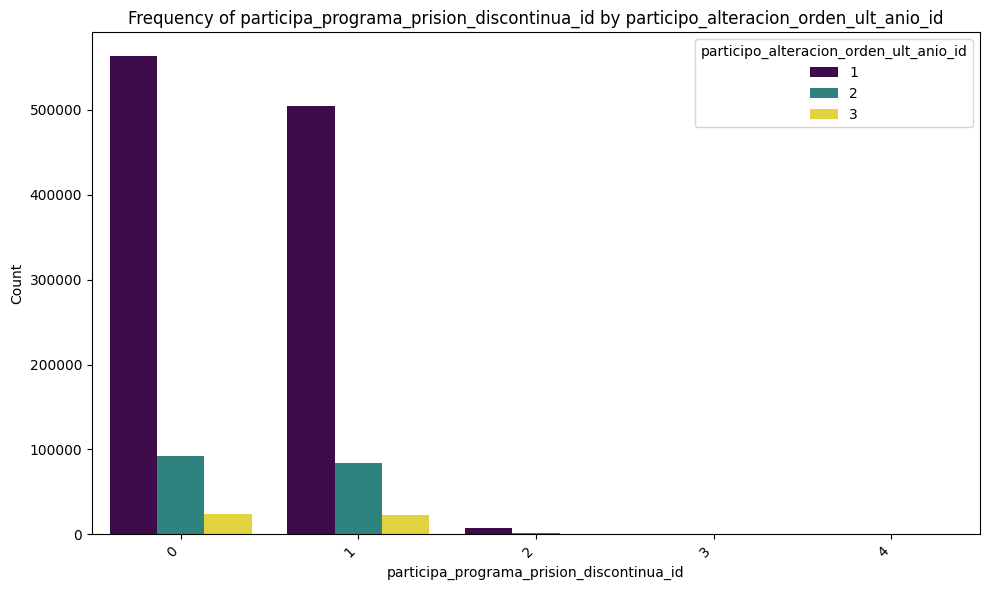

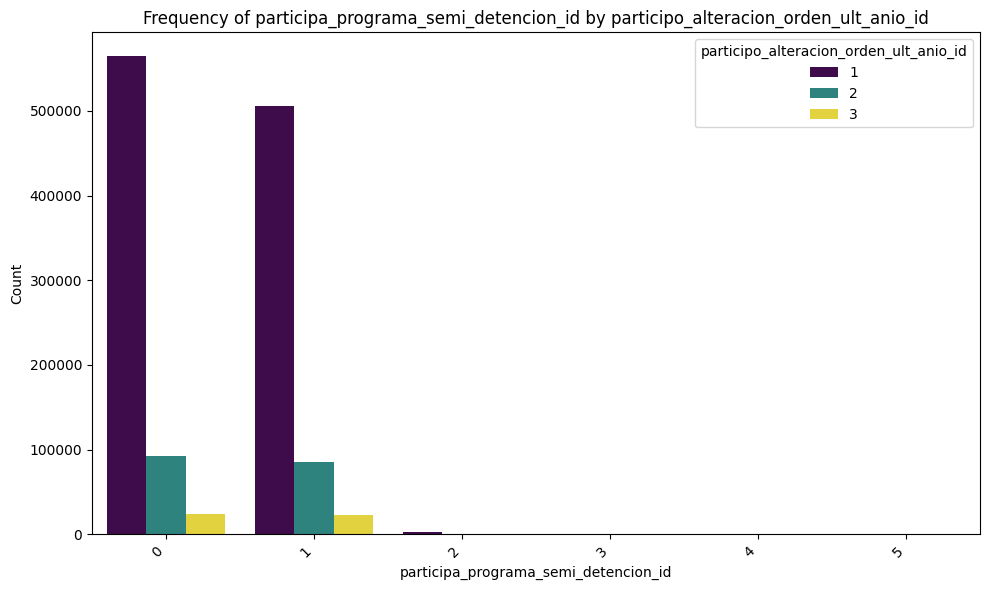

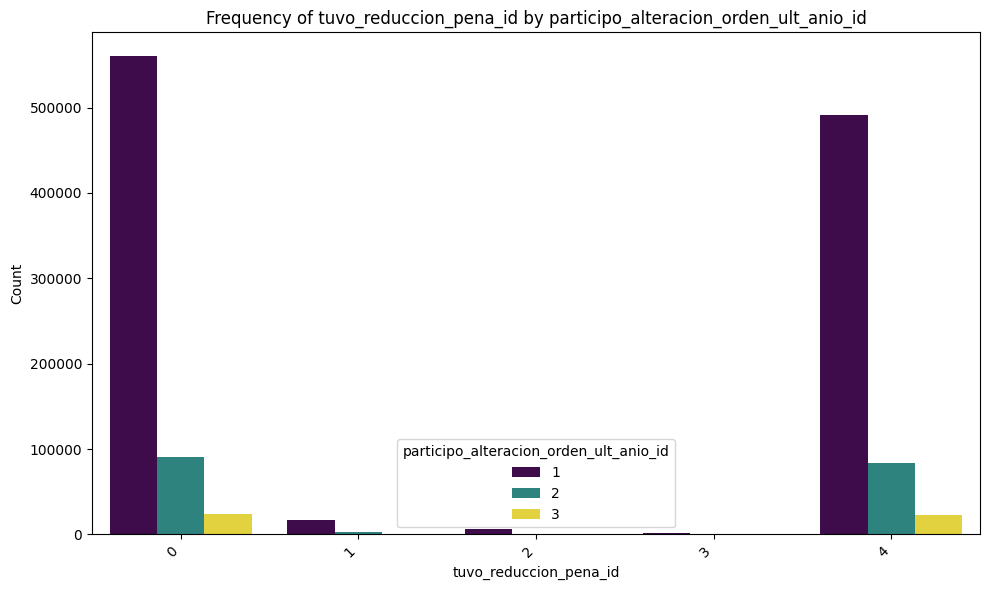

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target_variable = 'participo_alteracion_orden_ult_anio_id'
columns_to_exclude = ['edad', 'duracion_condena_anios', target_variable]

for column in df_filtered.columns:
    if column not in columns_to_exclude:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df_filtered, x=column, hue=target_variable, palette='viridis')
        plt.title(f'Frequency of {column} by {target_variable}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

In [ ]:
# Analyze relative frequency of each variable in relation to the target
target_variable = 'participo_alteracion_orden_ult_anio_id'

for column in df_filtered.columns:
    if column != target_variable:
        print(f"\nRelative frequency table for '{column}' vs '{target_variable}':")
        display(pd.crosstab(df_filtered[column], df_filtered[target_variable], normalize='index'))


Relative frequency table for 'censo_anio' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
censo_anio,,,
2002,0.841487,0.135599,0.022914
2003,0.793866,0.171837,0.034296
2004,0.726443,0.247133,0.026423
2005,0.599937,0.371729,0.028334
2006,0.722546,0.251518,0.025936
2007,0.708200,0.243651,0.048149
2008,0.781191,0.192099,0.026710
2009,0.795563,0.174639,0.029798
2010,0.810908,0.161055,0.028037



Relative frequency table for 'provincia_sneep_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
provincia_sneep_id,,,
1,0.824616,0.132002,0.043382
2,0.822425,0.155351,0.022225
3,0.777188,0.205684,0.017128
4,0.837508,0.154105,0.008387
5,0.900617,0.066297,0.033085
6,0.805602,0.140171,0.054227
7,0.900971,0.086909,0.012120
8,0.875158,0.103809,0.021033
9,0.814673,0.158877,0.026450



Relative frequency table for 'establecimiento_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
establecimiento_id,,,
15,0.739901,0.257143,0.002956
16,0.895494,0.097622,0.006884
17,0.855862,0.134529,0.009609
18,0.871813,0.108558,0.019629
19,0.339893,0.648946,0.011161
...,...,...,...
608,0.615385,0.384615,0.000000
609,1.000000,0.000000,0.000000
610,1.000000,0.000000,0.000000



Relative frequency table for 'edad' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
edad,,,
0,0.767668,0.196574,0.035758
15,0.800000,0.200000,0.000000
16,0.831395,0.162791,0.005814
17,0.741144,0.242507,0.016349
18,0.808818,0.168069,0.023113
...,...,...,...
94,0.400000,0.600000,0.000000
95,0.800000,0.200000,0.000000
96,1.000000,0.000000,0.000000



Relative frequency table for 'genero_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
genero_id,,,
1,0.826433,0.136608,0.036959
2,0.819965,0.152524,0.027512
3,0.749129,0.219512,0.031359
4,0.662921,0.303371,0.033708
5,0.500000,0.500000,0.000000



Relative frequency table for 'nacionalidad_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
nacionalidad_id,,,
0,0.909656,0.064484,0.025859
1,0.825865,0.137605,0.036530



Relative frequency table for 'estado_civil_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
estado_civil_id,,,
0,0.823631,0.136799,0.039570
2,0.833309,0.139422,0.027269
4,0.842028,0.140725,0.017248



Relative frequency table for 'nivel_instruccion_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
nivel_instruccion_id,,,
0,0.834214,0.138997,0.026789
2,0.821896,0.139395,0.038708
3,0.814139,0.149547,0.036313
4,0.823309,0.132906,0.043785
5,0.875128,0.098940,0.025932
6,0.884920,0.091765,0.023316
7,0.924127,0.060766,0.015106



Relative frequency table for 'ultima_situacion_laboral_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
ultima_situacion_laboral_id,,,
0,0.796008,0.182461,0.021531
1,0.852333,0.111860,0.035808
2,0.832591,0.129540,0.037869
3,0.810317,0.152230,0.037453



Relative frequency table for 'capacitacion_laboral_al_ingresar_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
capacitacion_laboral_al_ingresar_id,,,
0,0.783329,0.198410,0.018260
1,0.839788,0.125335,0.034877
2,0.858860,0.111530,0.029609
3,0.809003,0.149956,0.041041



Relative frequency table for 'situacion_legal_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
situacion_legal_id,,,
1,0.821501,0.140333,0.038166
2,0.829228,0.135668,0.035104
3,0.933333,0.066667,0.000000
4,0.902774,0.078732,0.018494
5,0.905528,0.071917,0.022555



Relative frequency table for 'delito1_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
delito1_id,,,
0,0.789743,0.185811,0.024446
1,0.831921,0.128546,0.039533
2,0.838960,0.125098,0.035942
3,0.822763,0.136066,0.041171
4,0.864882,0.098567,0.036551
5,0.804407,0.167902,0.027691
6,0.777804,0.188743,0.033453
7,0.912164,0.074530,0.013306
8,0.908172,0.072159,0.019670



Relative frequency table for 'delito2_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
delito2_id,,,
0,0.828924,0.134317,0.036759
1,0.802962,0.158910,0.038127
2,0.806059,0.158904,0.035037
3,0.783349,0.169347,0.047304
4,0.826736,0.135972,0.037292
5,0.783702,0.184792,0.031506
6,0.776361,0.182906,0.040733
7,0.842005,0.142132,0.015863
8,0.883362,0.098124,0.018514



Relative frequency table for 'delito3_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
delito3_id,,,
0,0.826686,0.136862,0.036452
1,0.800104,0.160230,0.039666
2,0.811966,0.149573,0.038462
3,0.778157,0.109215,0.112628
4,0.799569,0.155172,0.045259
5,0.818905,0.141294,0.039801
6,0.795588,0.159600,0.044812
7,0.831224,0.143460,0.025316
8,0.866432,0.108963,0.024605



Relative frequency table for 'delito4_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
delito4_id,,,
0,0.826749,0.136826,0.036425
1,0.744076,0.194313,0.061611
2,0.882629,0.058685,0.058685
3,0.769231,0.215385,0.015385
4,0.793539,0.148876,0.057584
5,0.719298,0.236842,0.043860
6,0.787594,0.171053,0.041353
7,0.882353,0.095588,0.022059
8,0.805147,0.158088,0.036765



Relative frequency table for 'delito5_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
delito5_id,,,
0,0.826169,0.137326,0.036505
1,0.797802,0.178022,0.024176
2,0.666667,0.333333,0.000000
3,0.725000,0.200000,0.075000
4,0.661538,0.266667,0.071795
5,0.885417,0.106250,0.008333
6,0.888143,0.064877,0.046980
7,0.609756,0.365854,0.024390
8,0.805243,0.168539,0.026217



Relative frequency table for 'horas_trabajo_remunerado_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
horas_trabajo_remunerado_id,,,
0,0.845150,0.123427,0.031422
1,0.783309,0.169532,0.047159
2,0.802239,0.157313,0.040448
3,0.852672,0.117822,0.029506
4,0.864900,0.102325,0.032775
5,0.818941,0.143891,0.037167



Relative frequency table for 'participacion_programa_laboral' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
participacion_programa_laboral,,,
0,0.814586,0.136179,0.049235
f,0.821915,0.141879,0.036207
t,0.845448,0.119493,0.035059



Relative frequency table for 'participacion_programa_educativo_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
participacion_programa_educativo_id,,,
0,0.832590,0.093783,0.073627
1,0.829957,0.137134,0.032909
2,0.823257,0.129732,0.047011
3,0.910218,0.078369,0.011413
4,0.882348,0.091186,0.026466
5,0.833125,0.141046,0.025829
6,0.820208,0.144500,0.035292



Relative frequency table for 'participacion_actividades_deportivas' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
participacion_actividades_deportivas,,,
0,0.859457,0.087423,0.053121
f,0.825153,0.143043,0.031804
t,0.825477,0.137055,0.037469



Relative frequency table for 'recibio_atencion_medica_ult_anio' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
recibio_atencion_medica_ult_anio,,,
0,0.871317,0.099421,0.029262
f,0.845954,0.101625,0.052421
t,0.808744,0.153222,0.038034



Relative frequency table for 'recibio_visitas_ultimo_anio' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
recibio_visitas_ultimo_anio,,,
0,0.738747,0.226297,0.034956
f,0.853676,0.111959,0.034365
t,0.823766,0.139414,0.036820



Relative frequency table for 'tipo_infraccion_disciplinaria_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
tipo_infraccion_disciplinaria_id,,,
0,0.839473,0.093301,0.067226
1,0.331523,0.468568,0.199910
2,0.496635,0.418148,0.085217
3,0.369381,0.585165,0.045455
4,0.940674,0.050063,0.009263



Relative frequency table for 'calificacion_conducta_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
calificacion_conducta_id,,,
0,0.759392,0.206480,0.034128
1,0.887299,0.087416,0.025285
2,0.810051,0.147047,0.042902
3,0.822782,0.143602,0.033616
4,0.548511,0.371438,0.080051
5,0.483766,0.397712,0.118522
6,0.440714,0.390250,0.169036
7,0.887641,0.096615,0.015743



Relative frequency table for 'tentativa_fugas_evasiones_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
tentativa_fugas_evasiones_id,,,
0,0.808633,0.100327,0.091040
1,0.580481,0.276855,0.142664
2,0.749128,0.213248,0.037623
3,0.827562,0.137756,0.034683



Relative frequency table for 'tentativa_suicidio' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
tentativa_suicidio,,,
0,0.741619,0.201650,0.056730
f,0.828366,0.135869,0.035766
t,0.541038,0.307782,0.151181



Relative frequency table for 'fue_lesionado_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
fue_lesionado_id,,,
0,0.823214,0.140923,0.035863
1,0.418453,0.247060,0.334487
2,0.710103,0.196125,0.093772
3,0.692952,0.235159,0.071888
4,0.851709,0.127215,0.021076



Relative frequency table for 'duracion_condena_anios' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
duracion_condena_anios,,,
0,0.829948,0.135625,0.034426
1,0.839790,0.120140,0.040070
2,0.819048,0.134273,0.046679
3,0.808325,0.145203,0.046472
4,0.834764,0.129247,0.035988
5,0.786888,0.167244,0.045868
6,0.799044,0.157883,0.043073
7,0.790020,0.165293,0.044687
8,0.840262,0.125913,0.033826



Relative frequency table for 'es_reincidente_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
es_reincidente_id,,,
0,0.832314,0.133306,0.034380
1,0.836164,0.128569,0.035266
2,0.770578,0.171104,0.058318
3,0.780568,0.176754,0.042678



Relative frequency table for 'tiene_periodo_progresividad_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
tiene_periodo_progresividad_id,,,
0,0.830020,0.134517,0.035463
1,0.818742,0.132485,0.048773
2,0.803372,0.156405,0.040223
3,0.890539,0.094414,0.015047
4,0.849236,0.121675,0.029089
5,0.828999,0.112077,0.058923
6,0.824760,0.139236,0.036004
7,0.833333,0.000000,0.166667



Relative frequency table for 'tuvo_salidas_transitorias_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
tuvo_salidas_transitorias_id,,,
0,0.824617,0.140433,0.034950
1,0.822736,0.136745,0.040518
2,0.881928,0.103245,0.014827
3,0.841665,0.130938,0.027397
4,0.820988,0.146914,0.032099



Relative frequency table for 'incorporado_reg_semi_libertad_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
incorporado_reg_semi_libertad_id,,,
0,0.825417,0.139756,0.034827
1,0.827187,0.133931,0.038882
2,0.821896,0.152213,0.025891
3,0.774767,0.174428,0.050804
4,0.795522,0.174627,0.029851



Relative frequency table for 'participa_programa_prision_discontinua_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
participa_programa_prision_discontinua_id,,,
0,0.827708,0.136287,0.036005
1,0.824989,0.137953,0.037058
2,0.780507,0.180911,0.038582
3,0.780347,0.196532,0.023121
4,0.772874,0.205597,0.021529



Relative frequency table for 'participa_programa_semi_detencion_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
participa_programa_semi_detencion_id,,,
0,0.827979,0.135955,0.036066
1,0.823581,0.139361,0.037058
2,0.848642,0.117723,0.033635
3,0.906827,0.079336,0.013838
4,0.904332,0.070397,0.025271
5,0.700000,0.100000,0.200000



Relative frequency table for 'tuvo_reduccion_pena_id' vs 'participo_alteracion_orden_ult_anio_id':


participo_alteracion_orden_ult_anio_id,1,2,3
tuvo_reduccion_pena_id,,,
0,0.829664,0.135150,0.035186
1,0.818860,0.134288,0.046852
2,0.897172,0.088916,0.013912
3,0.579251,0.393852,0.026897
4,0.822307,0.139762,0.037931


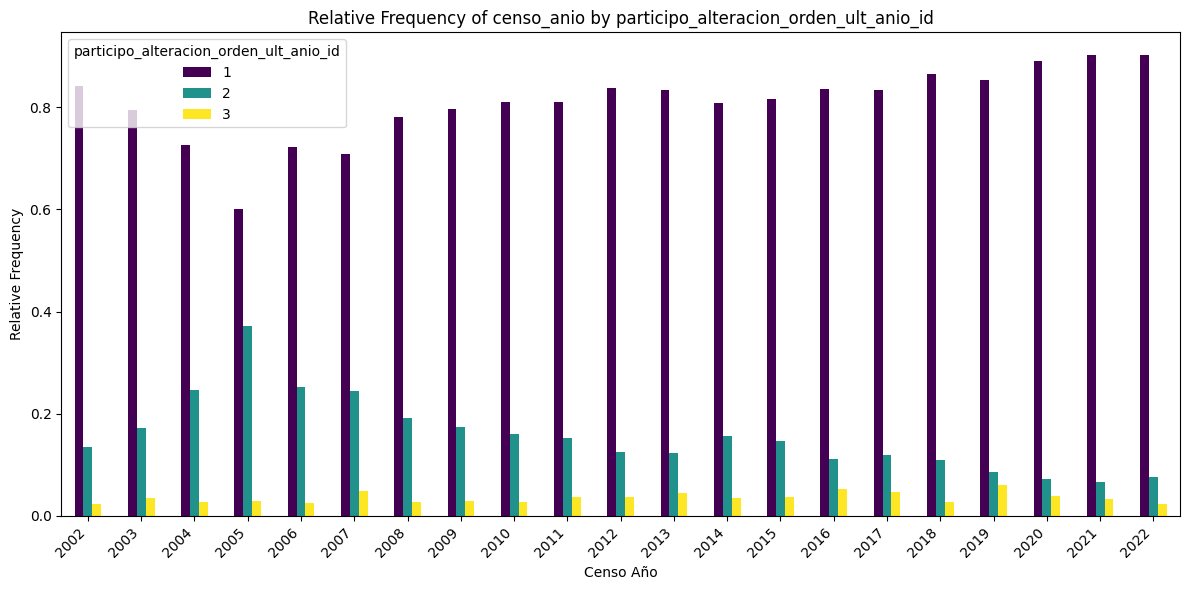

In [ ]:
# Calculate relative frequency for 'censo_anio' vs 'participo_alteracion_orden_ult_anio_id'
censo_anio_relative_freq = pd.crosstab(df_filtered['censo_anio'], df_filtered[target_variable], normalize='index')

# Plot the relative frequency
censo_anio_relative_freq.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title(f'Relative Frequency of censo_anio by {target_variable}')
plt.xlabel('Censo Año')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title=target_variable)
plt.tight_layout()
plt.show()

In [ ]:
!pip install scikit-posthocs

In [ ]:
from scipy import stats
import scikit_posthocs as sp

# Perform Kruskal-Wallis test
# We need to group the target variable by 'censo_anio'
groups = df_filtered.groupby('censo_anio')['participo_alteracion_orden_ult_anio_id'].apply(list)

# Perform Kruskal-Wallis test
kw_statistic, kw_p_value = stats.kruskal(*groups)

print(f"Kruskal-Wallis Test:")
print(f"  Statistic: {kw_statistic:.4f}")
print(f"  P-value: {kw_p_value:.4f}")

# Perform Dunn's post-hoc test if Kruskal-Wallis test is significant
if kw_p_value < 0.05:
    print("\nKruskal-Wallis test is significant, performing Dunn's post-hoc test:")
    # Create a list of arrays, one for each group
    data = [np.array(group) for group in groups]
    # Perform Dunn's test
    dunn_results = sp.posthoc_dunn(data, p_adjust='bonferroni')
    display(dunn_results)
else:
    print("\nKruskal-Wallis test is not significant, no post-hoc test needed.")

Kruskal-Wallis Test:
  Statistic: 34134.3244
  P-value: 0.0000

Kruskal-Wallis test is significant, performing Dunn's post-hoc test:


,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
1,1.000000e+00,1.463981e-64,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.367778e-106,2.490758e-65,3.536675e-30,4.933468e-36,...,2.742633e-03,1.320285e-39,2.171523e-24,1.109484e-03,1.206588e-05,2.199939e-17,1.000000e+00,6.004965e-78,3.284655e-131,8.437766e-139
2,1.463981e-64,1.000000e+00,6.605868e-123,0.000000e+00,3.765268e-130,1.453124e-209,1.098743e-02,1.000000e+00,3.385224e-09,2.587459e-06,...,4.209424e-46,2.462240e-06,4.122119e-16,1.048728e-48,5.482711e-46,1.095166e-185,1.608682e-107,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,6.605868e-123,1.000000e+00,0.000000e+00,1.000000e+00,3.797054e-14,1.455167e-92,4.549112e-150,5.744247e-238,9.069199e-223,...,0.000000e+00,8.145288e-237,5.336181e-292,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.438490e-300,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,0.000000e+00,3.765268e-130,1.000000e+00,0.000000e+00,1.000000e+00,7.399327e-09,9.791132e-100,3.760428e-157,1.374198e-243,1.101331e-228,...,0.000000e+00,4.474421e-242,1.353995e-295,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,0.000000e+00,1.453124e-209,3.797054e-14,2.438490e-300,7.399327e-09,1.000000e+00,5.141457e-174,1.314118e-249,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,2.367778e-106,1.098743e-02,1.455167e-92,0.000000e+00,9.791132e-100,5.141457e-174,1.000000e+00,3.116260e-05,3.365092e-28,5.544390e-23,...,3.735576e-86,7.487310e-24,1.761940e-41,8.983690e-92,3.198275e-89,1.600024e-281,1.541649e-178,0.000000e+00,0.000000e+00,0.000000e+00
8,2.490758e-65,1.000000e+00,4.549112e-150,0.000000e+00,3.760428e-157,1.314118e-249,3.116260e-05,1.000000e+00,1.153352e-07,7.494624e-05,...,2.503543e-46,7.472308e-05,1.162194e-14,2.151959e-49,1.226698e-46,1.202961e-203,1.418346e-115,0.000000e+00,0.000000e+00,0.000000e+00
9,3.536675e-30,3.385224e-09,5.744247e-238,0.000000e+00,1.374198e-243,0.000000e+00,3.365092e-28,1.153352e-07,1.000000e+00,1.000000e+00,...,4.134994e-15,1.000000e+00,1.000000e+00,4.030200e-16,6.918754e-14,9.187510e-130,1.795175e-59,1.252908e-271,0.000000e+00,0.000000e+00
10,4.933468e-36,2.587459e-06,9.069199e-223,0.000000e+00,1.101331e-228,0.000000e+00,5.544390e-23,7.494624e-05,1.000000e+00,1.000000e+00,...,6.635629e-20,1.000000e+00,3.903784e-01,2.940602e-21,7.654885e-19,2.065505e-144,1.365111e-69,6.022761e-293,0.000000e+00,0.000000e+00


### La prevalencia de alteración del orden en cada año censado fue cambiando a lo largo de los años.

In [ ]:
# Display value counts and proportions of the 'nacionalidad_id' column
print("Value counts of 'nacionalidad_id':")
display(df_filtered['nacionalidad_id'].value_counts())

print("\nProportions of 'nacionalidad_id':")
display(df_filtered['nacionalidad_id'].value_counts(normalize=True))

Value counts of 'nacionalidad_id':


,count
nacionalidad_id,
1,1298379
0,3055



Proportions of 'nacionalidad_id':


,proportion
nacionalidad_id,
1,0.997653
0,0.002347


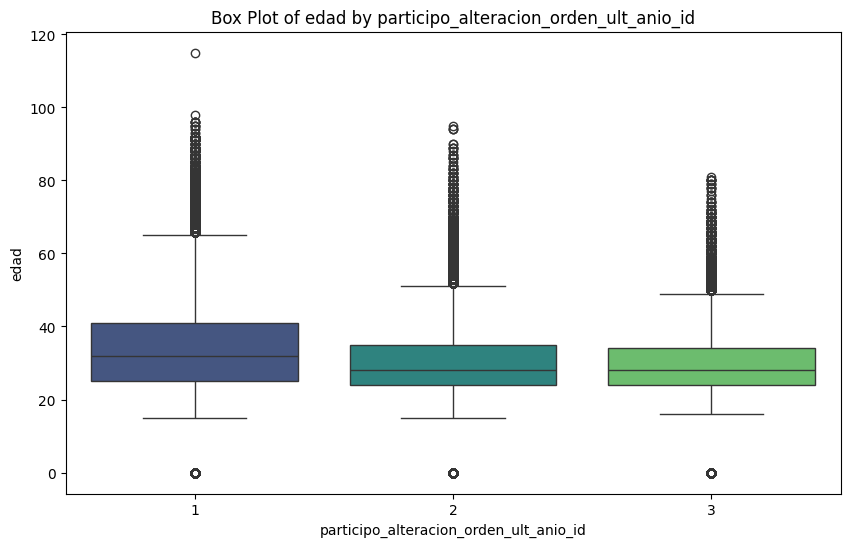

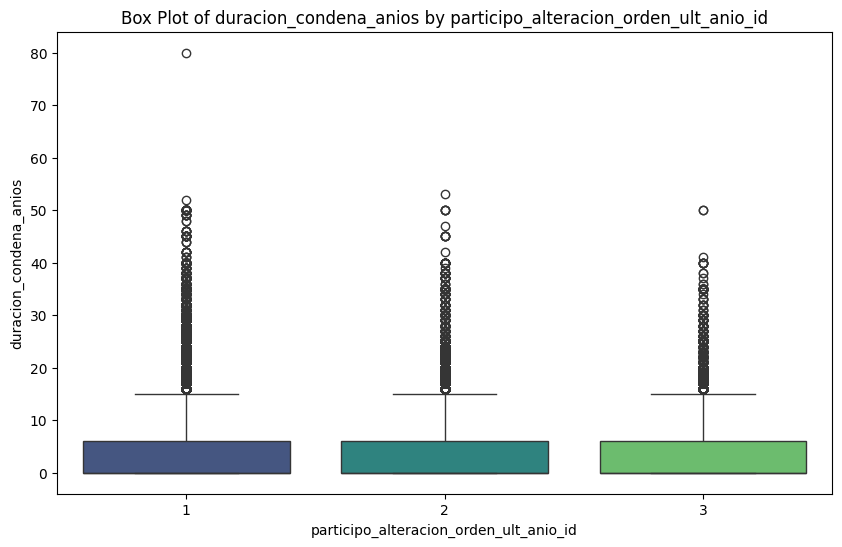

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target_variable = 'participo_alteracion_orden_ult_anio_id'
columns_to_plot = ['edad', 'duracion_condena_anios']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_filtered, x=target_variable, y=column, palette='viridis')
    plt.title(f'Box Plot of {column} by {target_variable}')
    plt.xlabel(target_variable)
    plt.ylabel(column)
    plt.show()

## Análisis de Correlaciones

In [ ]:
# 7. Análisis Bivariado
# Select only numeric columns for correlation matrix
df_numeric = df_modified.select_dtypes(include=np.number)

# Computar matriz de correlación
corr_matrix = df_numeric.corr()

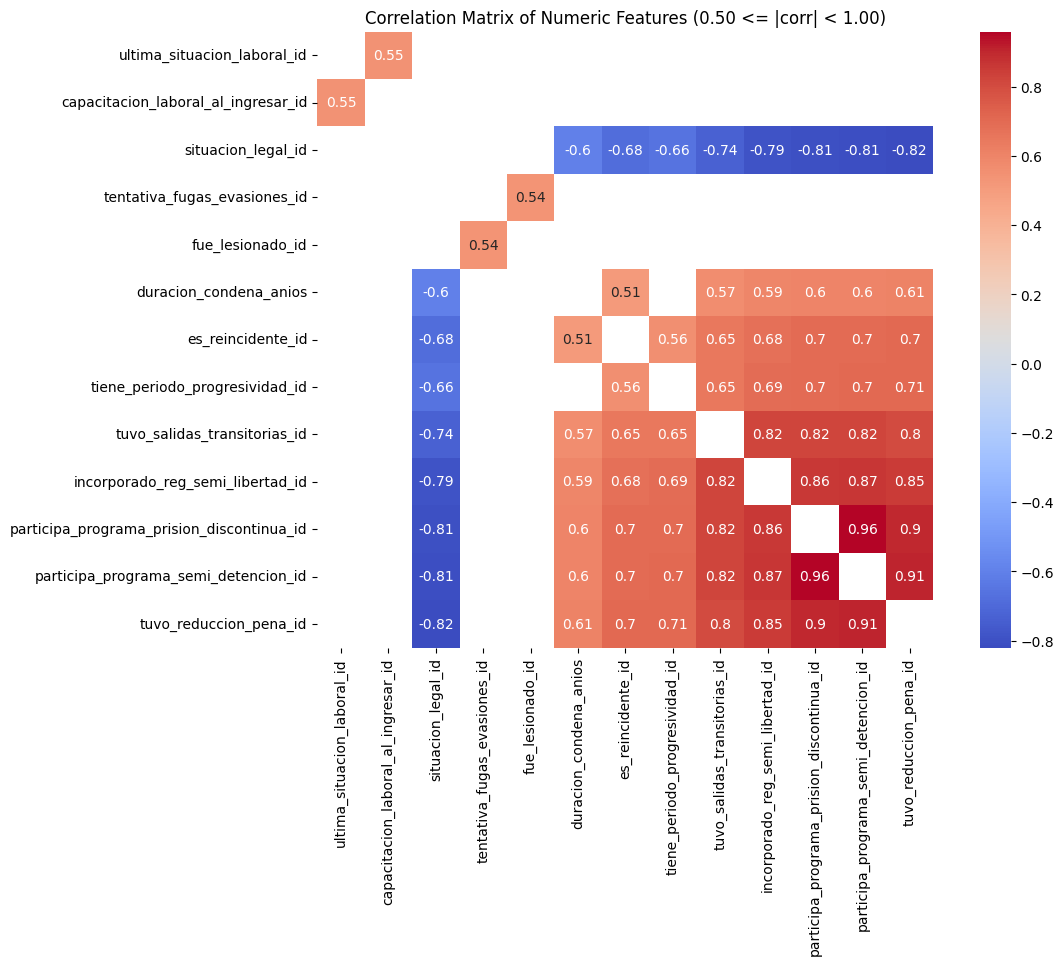

In [ ]:
# Filter the correlation matrix to show only correlations between 0.50 and 0.99
filtered_corr_matrix = corr_matrix[(corr_matrix >= 0.50) & (corr_matrix < 1.00) | (corr_matrix > -1.00) & (corr_matrix <= -0.50)]

# Remove rows and columns with all NaN values (due to filtering)
filtered_corr_matrix.dropna(axis=0, how='all', inplace=True)
filtered_corr_matrix.dropna(axis=1, how='all', inplace=True)


# Generate heatmap for filtered matrix
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Features (0.50 <= |corr| < 1.00)')
plt.show()

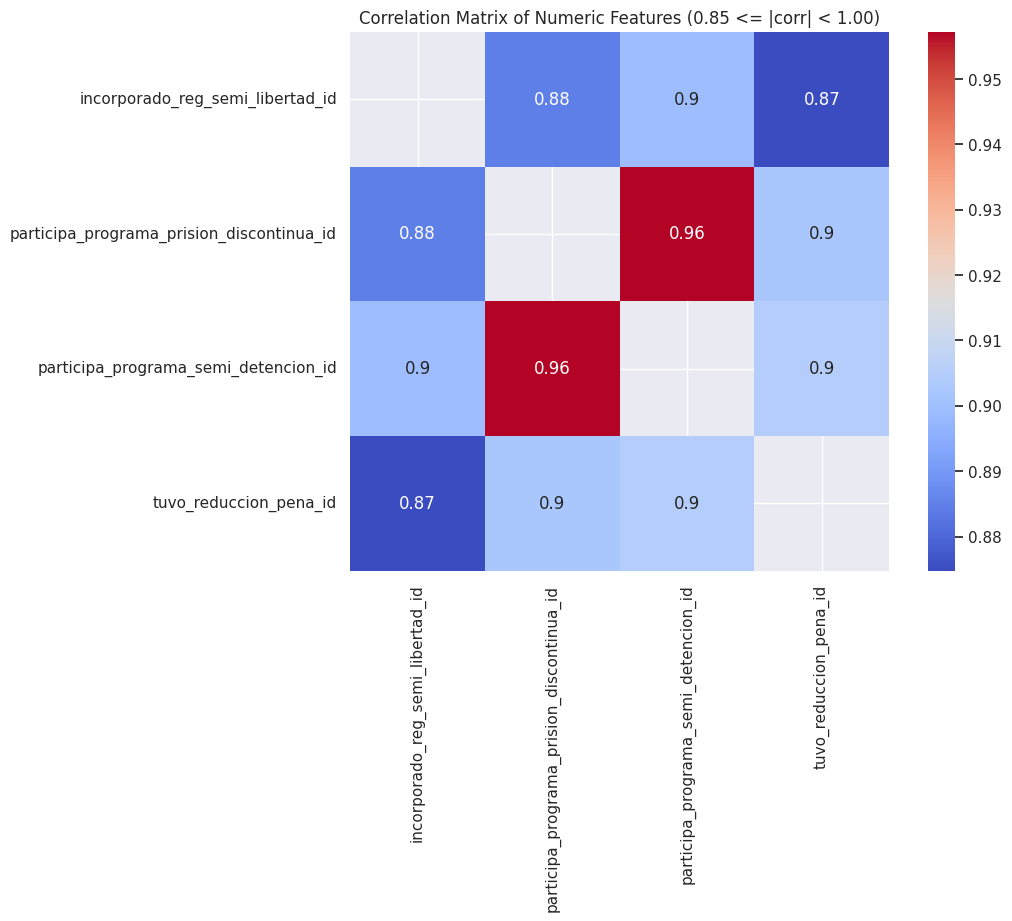

In [ ]:
# Filter the correlation matrix to show only correlations between 0.85 and 0.99
filtered_corr_matrix_high = corr_matrix[(corr_matrix >= 0.85) & (corr_matrix < 1.00) | (corr_matrix > -1.00) & (corr_matrix <= -0.85)]

# Remove rows and columns with all NaN values (due to filtering)
filtered_corr_matrix_high.dropna(axis=0, how='all', inplace=True)
filtered_corr_matrix_high.dropna(axis=1, how='all', inplace=True)


# Generate heatmap for filtered matrix
plt.figure(figsize=(10, 7))
sns.heatmap(filtered_corr_matrix_high, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Features (0.85 <= |corr| < 1.00)')
plt.show()

Si bien hay varias variables con correlacion mayor a 0,85, al no pensar utilizar un modelo de regresión logistica y no tener problema de multidimencionalidad, porque se cuenta con una bases de datos grande, en un primer momento no se van a agrupar variables ni eliminar.

In [ ]:
# Display value counts and proportions of the 'genero_id' column
print("Value counts of 'genero_id':")
display(df_filtered['genero_id'].value_counts())

print("\nProportions of 'genero_id':")
display(df_filtered['genero_id'].value_counts(normalize=True))

Value counts of 'genero_id':


,count
genero_id,
1,1238472
2,62010
3,861
4,89
5,2



Proportions of 'genero_id':


,proportion
genero_id,
1,0.951621
2,0.047647
3,0.000662
4,0.000068
5,0.000002


### Subset del dataset original 2010 a 2022

In [ ]:
# Create a subset of df_filtered with data from 2010 to 2022
df_subset = df_filtered[(df_filtered['censo_anio'] >= 2010) & (df_filtered['censo_anio'] <= 2022)].copy()

# Display the shape of the new subset
print("Shape of the subset DataFrame (2010-2022):", df_subset.shape)

# Display the unique values in the 'censo_anio' column of the subset to verify
print("\nUnique values in 'censo_anio' column of the subset:")
display(df_subset['censo_anio'].unique())

Shape of the subset DataFrame (2010-2022): (971672, 36)

Unique values in 'censo_anio' column of the subset:


array([2010, 2014, 2011, 2012, 2013, 2015, 2017, 2018, 2019, 2021, 2022,
       2020, 2016])

In [ ]:
df_modified = df_subset

In [ ]:
df_modified.shape

(971672, 36)

In [ ]:
# Show the count of rows per year in the filtered DataFrame
print("Row count per year in df_modified:")
display(df_modified['censo_anio'].value_counts().sort_index())

Row count per year in df_modified:


,count
censo_anio,
2010,51467
2011,51731
2012,54427
2013,58690
2014,60849
2015,64982
2016,69429
2017,79285
2018,90690


In [ ]:
# Calculate the total number of rows in df_modified
total_rows = df_modified.shape[0]

# Calculate the proportion of rows for the range 2010-2018
proportion_2010_2018 = count_2010_2018 / total_rows
print(f"Proportion of rows from 2010 to 2018 in df_modified: {proportion_2010_2018:.4f}")

# Calculate the proportion of rows for the range 2019-2021
proportion_2019_2021 = count_2019_2021 / total_rows
print(f"Proportion of rows from 2019 to 2021 in df_modified: {proportion_2019_2021:.4f}")

# Calculate the proportion of rows for the year 2022
count_2022 = df_modified[df_modified['censo_anio'] == 2022].shape[0]
proportion_2022 = count_2022 / total_rows
print(f"Proportion of rows from 2022 in df_modified: {proportion_2022:.4f}")

Proportion of rows from 2010 to 2018 in df_modified: 0.5985
Proportion of rows from 2019 to 2021 in df_modified: 0.2968
Proportion of rows from 2022 in df_modified: 0.1047


### Para el train se utilizara 2010-2018 (60% del dataset), validation de 2019-2021 (30% del dataset) y test 2022 (10%)


### Prevalencia de cada categoría del target dentro de los grupos para train, validation y test.

In [ ]:
# Calculate and display relative frequency for the range 2012-2018
print("\nRelative frequency for 2010-2018:")
display(df_modified[(df_modified['censo_anio'] >= 2010) & (df_modified['censo_anio'] <= 2018)]['participo_alteracion_orden_ult_anio_id'].value_counts(normalize=True))

# Calculate and display relative frequency for the range 2019-2021
print("\nRelative frequency for 2019-2021:")
display(df_modified[(df_modified['censo_anio'] >= 2019) & (df_modified['censo_anio'] <= 2021)]['participo_alteracion_orden_ult_anio_id'].value_counts(normalize=True))

# Calculate and display relative frequency for the year 2022
print("\nRelative frequency for 2022:")
display(df_modified[df_modified['censo_anio'] == 2022]['participo_alteracion_orden_ult_anio_id'].value_counts(normalize=True))


Relative frequency for 2010-2018:


,proportion
participo_alteracion_orden_ult_anio_id,
1,0.830352
2,0.130991
3,0.038657



Relative frequency for 2019-2021:


,proportion
participo_alteracion_orden_ult_anio_id,
1,0.881090
2,0.074896
3,0.044013



Relative frequency for 2022:


,proportion
participo_alteracion_orden_ult_anio_id,
1,0.901111
2,0.075715
3,0.023174


### Si bien en el primer grupo de entrenamiento la prevalencia de la categoría 2 es mayor, esperamos que durante el proceso de validación escalonado por años, el modelo logre predecir correctamente en el grupo de testeo.

#Evaluación de Modelos

In [ ]:
# LIBRERIAS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# PARAMETROS

rnd_state = 42

## Arboles de Desición: LGBM y CatBoost

## LGBMClassifier

#### Rolling window: entrena de 2010 hasta año n-1 y testea en el año n.

2019–2021 como validación.

Esto genera un historial de métricas “año a año”, que muestra la estabilidad del modelo en el tiempo.

Finalmente, se entrena con todo 2010–2021 y se prueba en 2022 (holdout real).

Años disponibles: [np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]

>>> Entrenando hasta 2018, validando en 2019
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.139709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 618
[LightGBM] [Info] Number of data points in the train set: 581550, number of used features: 34
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Balanced Accuracy: 0.6224
F1 Macro: 0.5685

>>> Entrenando hasta 2019, validando en 2020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.164568 seconds.
You can set `force_

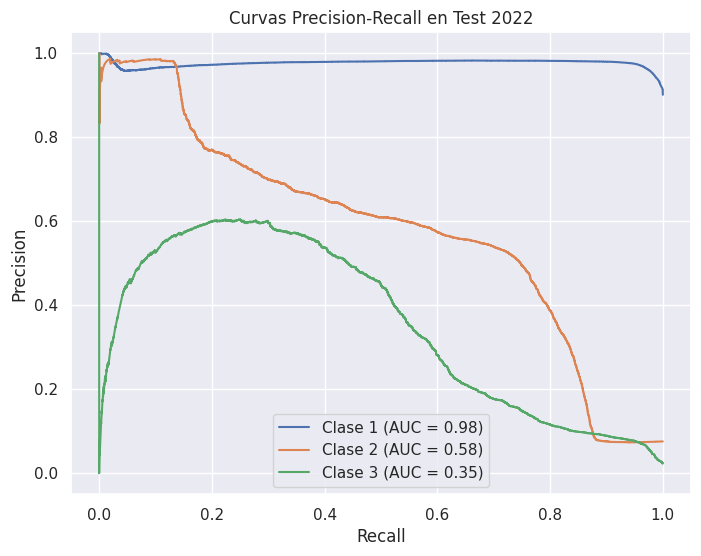

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    classification_report, confusion_matrix,
    f1_score, balanced_accuracy_score,
    precision_recall_curve, auc
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
import lightgbm as lgb

# -----------------------------
# 1. Separar features y target
# -----------------------------
X = df_modified.drop(['participo_alteracion_orden_ult_anio_id'], axis=1, errors='ignore')
y = df_modified['participo_alteracion_orden_ult_anio_id']

# Identificar columnas categóricas
categorical_cols = X.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    X[col] = X[col].astype('category')

# -----------------------------
# 2. Rolling Window Validation
# -----------------------------
years = sorted(X['censo_anio'].unique())
print("Años disponibles:", years)

metrics_per_year = []

for val_year in range(2019, 2022):  # de 2019 a 2021 validamos
    print(f"\n>>> Entrenando hasta {val_year-1}, validando en {val_year}")

    # Train = todo hasta año previo
    X_train = X[X['censo_anio'] < val_year].drop('censo_anio', axis=1)
    y_train = y[X_train.index]

    # Validation = año actual
    X_val = X[X['censo_anio'] == val_year].drop('censo_anio', axis=1)
    y_val = y[X_val.index]

    # Modelo con Regularización / hiperparámetros:
    lgbm_model = LGBMClassifier(
        random_state=42,
        n_estimators=500,
        learning_rate=0.05,
        num_leaves=64,
        class_weight="balanced"
    )

    # Use callbacks for early stopping
    callbacks = [lgb.early_stopping(stopping_rounds=30, verbose=False)]

    lgbm_model.fit(
        X_train, y_train,
        categorical_feature=[c for c in categorical_cols if c != 'censo_anio'],
        eval_set=[(X_val, y_val)],
        eval_metric="logloss",
        callbacks=callbacks # Use callbacks parameter
    )

    # Predicciones
    y_val_pred = lgbm_model.predict(X_val)
    y_val_proba = lgbm_model.predict_proba(X_val)

    # Métricas
    bal_acc = balanced_accuracy_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred, average="macro")

    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(f"F1 Macro: {f1:.4f}")

    metrics_per_year.append({
        "validation_year": val_year,
        "balanced_accuracy": bal_acc,
        "f1_macro": f1
    })

# Convertir a DataFrame
metrics_df = pd.DataFrame(metrics_per_year)
print("\nResumen Rolling Window CV:")
print(metrics_df)

# -----------------------------
# 3. Entrenamiento final en 2010–2021 y test en 2022
# -----------------------------
X_train_val = X[X['censo_anio'] < 2022].drop('censo_anio', axis=1)
y_train_val = y[X_train_val.index]

X_test = X[X['censo_anio'] == 2022].drop('censo_anio', axis=1)
y_test = y[X_test.index]

lgbm_final = LGBMClassifier(
    random_state=42,
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=64,
    class_weight="balanced"
)
lgbm_final.fit(
    X_train_val, y_train_val,
    categorical_feature=[c for c in categorical_cols if c != 'censo_anio']
)

y_pred_test = lgbm_final.predict(X_test)
y_probs_test = lgbm_final.predict_proba(X_test)

print("\n--- Evaluación final en Holdout 2022 ---")
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_test))
print("F1 Macro:", f1_score(y_test, y_pred_test, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

# -----------------------------
# 4. Precision-Recall en test
# -----------------------------
classes = lgbm_final.classes_
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_probs_test[:, i])
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f'Clase {classes[i]} (AUC = {auc_score:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curvas Precision-Recall en Test 2022')
plt.legend()
plt.grid(True)
plt.show()

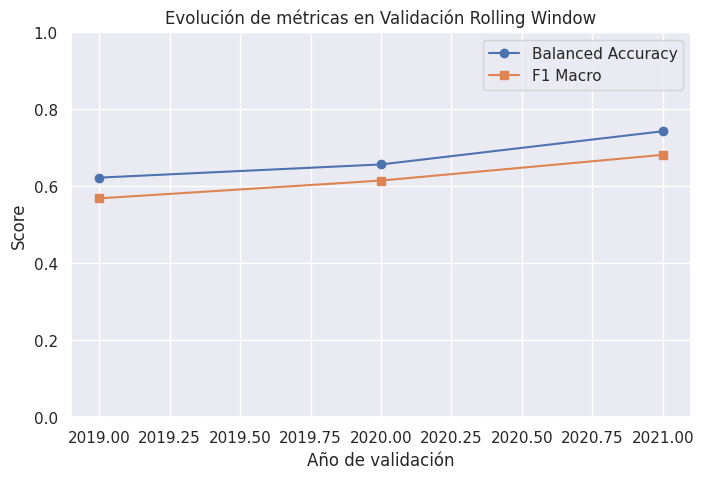

In [ ]:
# 5. Evolución de métricas en Rolling Window CV
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(metrics_df["validation_year"], metrics_df["balanced_accuracy"], marker="o", label="Balanced Accuracy")
plt.plot(metrics_df["validation_year"], metrics_df["f1_macro"], marker="s", label="F1 Macro")

plt.title("Evolución de métricas en Validación Rolling Window")
plt.xlabel("Año de validación")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.show()

### Esta gráfica muestra si el modelo mantiene desempeño estable en el tiempo o si empieza a degradarse al acercarse a 2022.

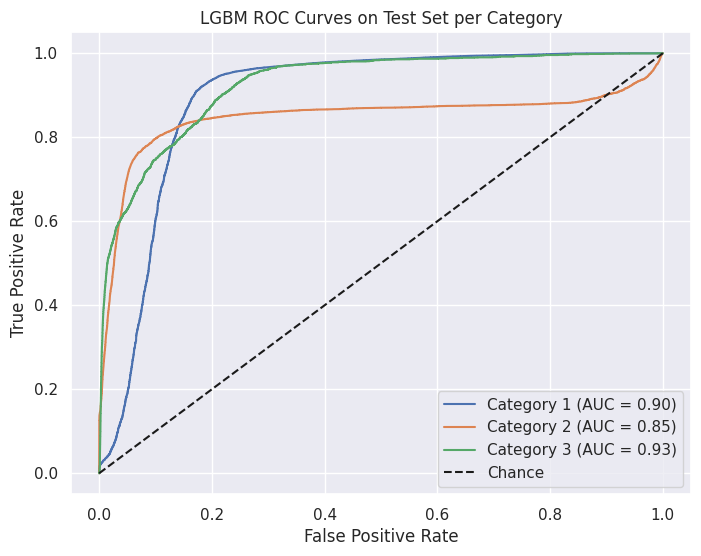

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output for multi-class
classes = lgbm_final.classes_
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Get predicted probabilities from LGBM model
y_probs_lgbm_test = lgbm_final.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs_lgbm_test[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Category {lgbm_final.classes_[i]} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGBM ROC Curves on Test Set per Category')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Top 15 Feature Importances (LGBM - Relative Frequency):


,0
establecimiento_id,0.216963
provincia_sneep_id,0.069280
tipo_infraccion_disciplinaria_id,0.068741
edad,0.063735
calificacion_conducta_id,0.050423
fue_lesionado_id,0.046328
horas_trabajo_remunerado_id,0.042243
delito1_id,0.041587
recibio_atencion_medica_ult_anio,0.041175
participacion_programa_educativo_id,0.037259


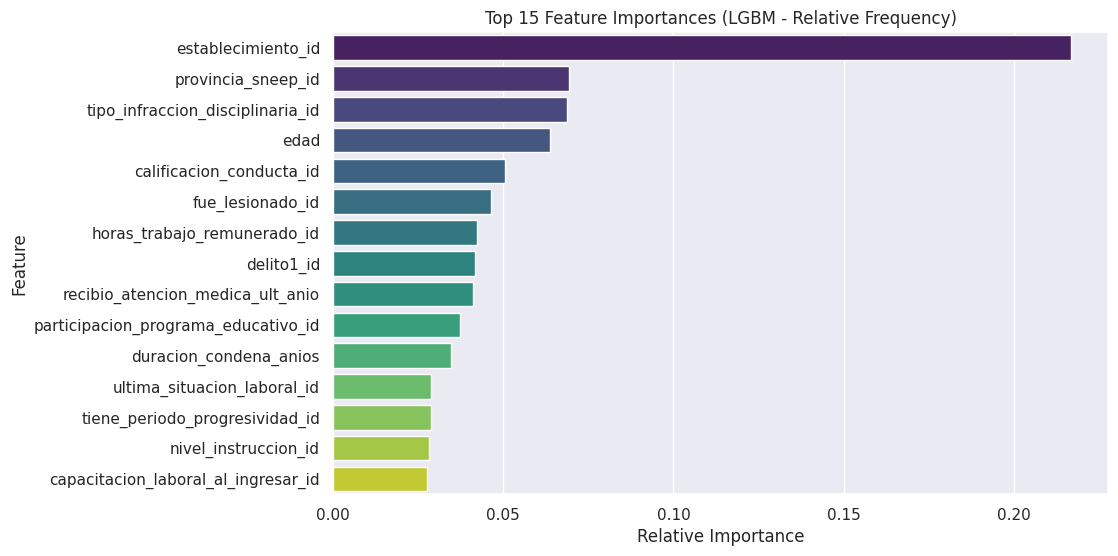

In [ ]:
# Display feature importances for LGBM
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances_lgbm = pd.Series(lgbm_final.feature_importances_, index=X_train_val.columns)

# Calculate relative frequencies
feature_importances_lgbm_relative = feature_importances_lgbm / feature_importances_lgbm.sum()

# Sort feature importances and get the top 15 relative frequencies
top_15_features_lgbm_relative = feature_importances_lgbm_relative.nlargest(15)


print("Top 15 Feature Importances (LGBM - Relative Frequency):")
display(top_15_features_lgbm_relative)

# Plot feature importances with relative frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_features_lgbm_relative.values, y=top_15_features_lgbm_relative.index, palette='viridis')
plt.title('Top 15 Feature Importances (LGBM - Relative Frequency)')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
!pip install shap

In [ ]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(lgbm_final)

shap_values = explainer.shap_values(X_test)

Variable Importance Plot - Global Interpretation


<Figure size 640x480 with 0 Axes>

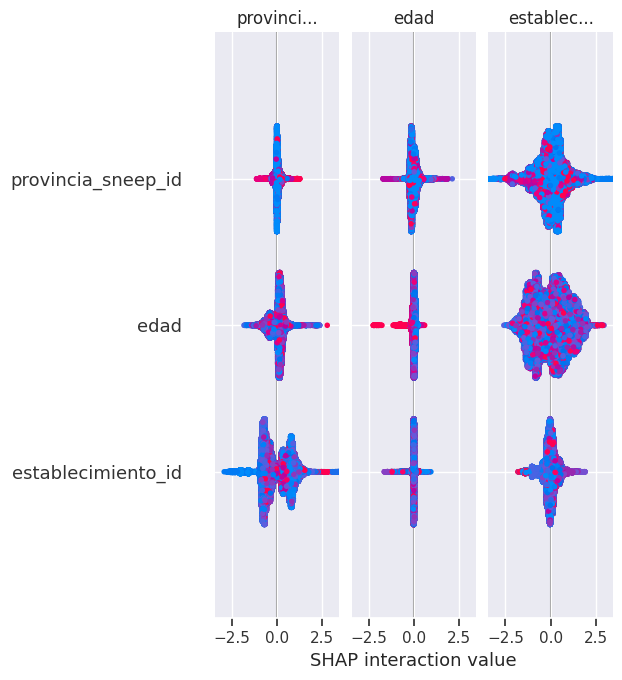

In [ ]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

# Modelo CatBoost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.1 MB/s eta 0:00:00


Años disponibles: [np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]

>>> Entrenando hasta 2018, validando en 2019
Balanced Accuracy: 0.6046
F1 Macro: 0.5455

>>> Entrenando hasta 2019, validando en 2020
Balanced Accuracy: 0.6330
F1 Macro: 0.5777

>>> Entrenando hasta 2020, validando en 2021
Balanced Accuracy: 0.7499
F1 Macro: 0.6592

Resumen Rolling Window CV:
   validation_year  balanced_accuracy  f1_macro
0             2019           0.604605  0.545515
1             2020           0.633010  0.577713
2             2021           0.749894  0.659199

--- Evaluación final en Holdout 2022 ---
Balanced Accuracy: 0.737112847304303
F1 Macro: 0.6346448728980835

Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.92      0.95     91652
           2       0.51      0.70      0.59 

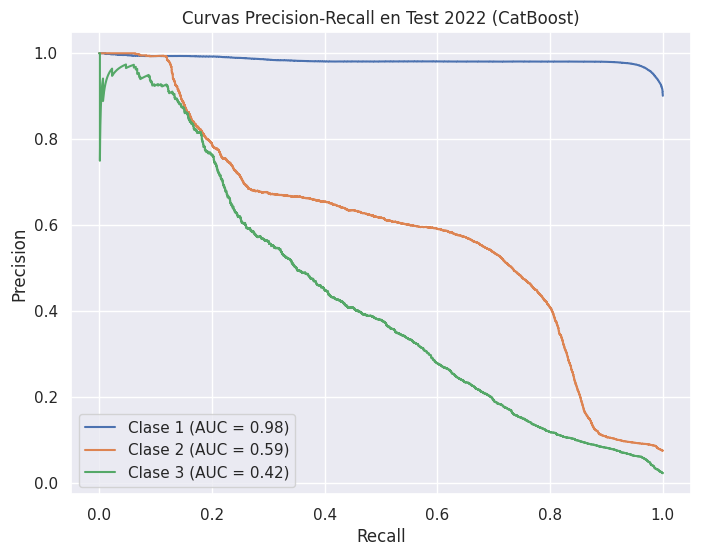

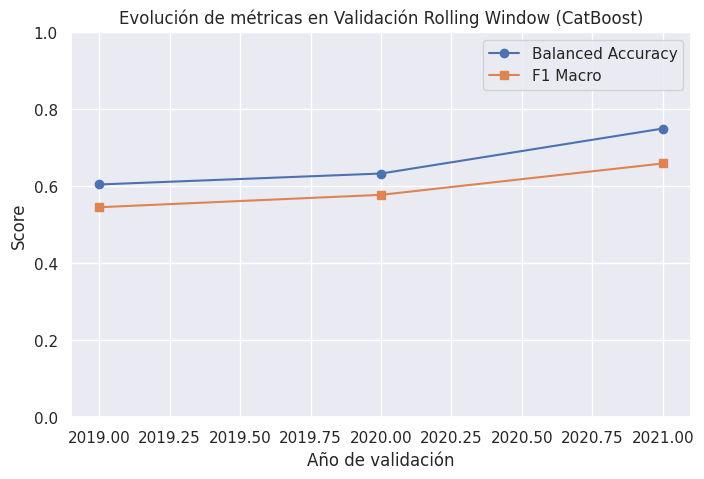

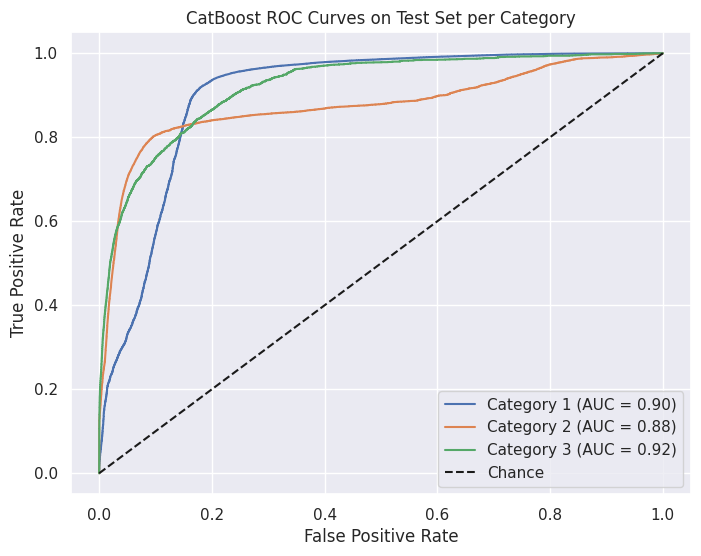

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    classification_report, confusion_matrix,
    f1_score, balanced_accuracy_score,
    precision_recall_curve, auc
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# -----------------------------
# 1. Separar features y target
# -----------------------------
X = df_modified.drop(['participo_alteracion_orden_ult_anio_id'], axis=1, errors='ignore')
y = df_modified['participo_alteracion_orden_ult_anio_id']

# Identificar columnas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    X[col] = X[col].astype('str')  # CatBoost requiere strings para cat_features

# Calculate class weights
class_counts = y.value_counts()
total_samples = len(y)
class_weights = {cls: total_samples / (len(class_counts) * count) for cls, count in class_counts.items()}

# Sort class weights by class label
sorted_class_weights = [class_weights[cls] for cls in sorted(class_weights.keys())]

# -----------------------------
# 2. Rolling Window Validation
# -----------------------------
years = sorted(X['censo_anio'].unique())
print("Años disponibles:", years)

metrics_per_year = []

for val_year in range(2019, 2022):  # validamos de 2019 a 2021
    print(f"\n>>> Entrenando hasta {val_year-1}, validando en {val_year}")

    # Train = todo hasta año previo
    X_train = X[X['censo_anio'] < val_year].drop('censo_anio', axis=1)
    y_train = y[X_train.index]

    # Validation = año actual
    X_val = X[X['censo_anio'] == val_year].drop('censo_anio', axis=1)
    y_val = y[X_val.index]

    # Modelo
    cat_model = CatBoostClassifier(
        iterations=500,
        learning_rate=0.05,
        depth=8,
        random_seed=42,
        loss_function="MultiClass",
        class_weights=sorted_class_weights, # Use calculated class weights
        verbose=False
    )

    cat_model.fit(
        X_train, y_train,
        cat_features=[X_train.columns.get_loc(c) for c in categorical_cols if c in X_train.columns],
        eval_set=(X_val, y_val),
        early_stopping_rounds=30,
        use_best_model=True
    )

    # Predicciones
    y_val_pred = cat_model.predict(X_val)
    y_val_proba = cat_model.predict_proba(X_val)

    # Métricas
    bal_acc = balanced_accuracy_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred, average="macro")

    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(f"F1 Macro: {f1:.4f}")

    metrics_per_year.append({
        "validation_year": val_year,
        "balanced_accuracy": bal_acc,
        "f1_macro": f1
    })

# Convertir a DataFrame
metrics_df = pd.DataFrame(metrics_per_year)
print("\nResumen Rolling Window CV:")
print(metrics_df)

# -----------------------------
# 3. Entrenamiento final (2010–2021) y test en 2022
# -----------------------------
X_train_val = X[X['censo_anio'] < 2022].drop('censo_anio', axis=1)
y_train_val = y[X_train_val.index]

X_test = X[X['censo_anio'] == 2022].drop('censo_anio', axis=1)
y_test = y[X_test.index]

cat_final = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    random_seed=42,
    loss_function="MultiClass",
    class_weights=sorted_class_weights, # Use calculated class weights
    verbose=False
)
cat_final.fit(
    X_train_val, y_train_val,
    cat_features=[X_train_val.columns.get_loc(c) for c in categorical_cols if c in X_train_val.columns]
)

y_pred_test = cat_final.predict(X_test)
y_probs_test = cat_final.predict_proba(X_test)

print("\n--- Evaluación final en Holdout 2022 ---")
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_test))
print("F1 Macro:", f1_score(y_test, y_pred_test, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

# -----------------------------
# 4. Precision-Recall en test
# -----------------------------
classes = cat_final.classes_
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_probs_test[:, i])
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f'Clase {classes[i]} (AUC = {auc_score:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curvas Precision-Recall en Test 2022 (CatBoost)')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 5. Evolución de métricas en Rolling Window CV
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(metrics_df["validation_year"], metrics_df["balanced_accuracy"], marker="o", label="Balanced Accuracy")
plt.plot(metrics_df["validation_year"], metrics_df["f1_macro"], marker="s", label="F1 Macro")

plt.title("Evolución de métricas en Validación Rolling Window (CatBoost)")
plt.xlabel("Año de validación")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.show()

#-------------------------
# 6. Curvas ROC
#----------------------------

# Binarize the output for multi-class
classes = cat_final.classes_
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Get predicted probabilities from CatBoost model
y_probs_cat_test = cat_final.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs_cat_test[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Category {cat_final.classes_[i]} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC Curves on Test Set per Category')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Top 15 Feature Importances (CatBoost - Relative Frequency):


,0
establecimiento_id,0.275787
tipo_infraccion_disciplinaria_id,0.181893
provincia_sneep_id,0.133709
fue_lesionado_id,0.076781
recibio_atencion_medica_ult_anio,0.075651
horas_trabajo_remunerado_id,0.037555
calificacion_conducta_id,0.025273
participacion_actividades_deportivas,0.021050
ultima_situacion_laboral_id,0.019906
capacitacion_laboral_al_ingresar_id,0.019325


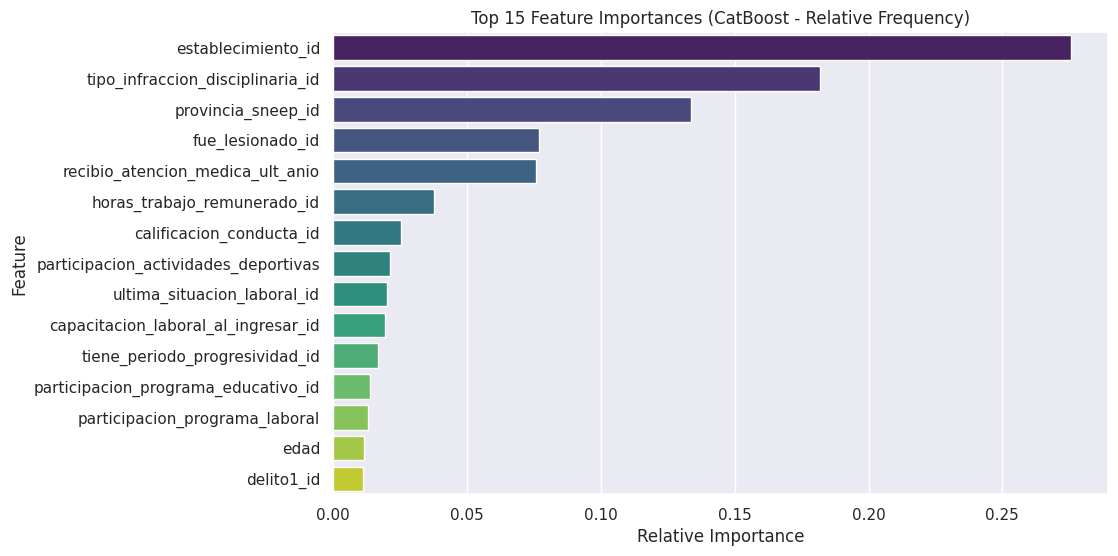

In [ ]:
# Display feature importances for CatBoost
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances_cat = pd.Series(cat_final.feature_importances_, index=X_train_val.columns)

# Calculate relative frequencies
feature_importances_cat_relative = feature_importances_cat / feature_importances_cat.sum()

# Sort feature importances and get the top 15 relative frequencies
top_15_features_cat_relative = feature_importances_cat_relative.nlargest(15)


print("Top 15 Feature Importances (CatBoost - Relative Frequency):")
display(top_15_features_cat_relative)

# Plot feature importances with relative frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_features_cat_relative.values, y=top_15_features_cat_relative.index, palette='viridis')
plt.title('Top 15 Feature Importances (CatBoost - Relative Frequency)')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

## Comparación de Modelos

#### Create a DataFrame to display the extracted metrics for comparison.



In [ ]:
# Create a dictionary to store the metrics
comparison_metrics = {
    "Model": ["LGBM", "CatBoost"],
    "Balanced Accuracy (2022 Test)": [balanced_accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, cat_final.predict(X_test))],
    "F1 Macro (2022 Test)": [f1_score(y_test, y_pred_test, average='macro'), f1_score(y_test, cat_final.predict(X_test), average='macro')]
}

# Calculate Precision-Recall AUC for Category 2 and 3 for both models
classes = lgbm_final.classes_
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Ensure categorical features in X_test have the 'category' dtype for prediction
for col in categorical_cols:
    if col in X_test.columns:
        X_test[col] = X_test[col].astype('category')

# Get predicted probabilities
y_probs_lgbm_test = lgbm_final.predict_proba(X_test)
y_probs_cat_test = cat_final.predict_proba(X_test)


# Calculate AUC for Category 2 (index 1)
precision_lgbm_cat2, recall_lgbm_cat2, _ = precision_recall_curve(y_test_bin[:, 1], y_probs_lgbm_test[:, 1])
auc_lgbm_cat2 = auc(recall_lgbm_cat2, precision_lgbm_cat2)

precision_cat_cat2, recall_cat_cat2, _ = precision_recall_curve(y_test_bin[:, 1], y_probs_cat_test[:, 1])
auc_cat_cat2 = auc(recall_cat_cat2, precision_cat_cat2)

comparison_metrics["PR AUC (Category 2)"] = [auc_lgbm_cat2, auc_cat_cat2]

# Calculate AUC for Category 3 (index 2)
precision_lgbm_cat3, recall_lgbm_cat3, _ = precision_recall_curve(y_test_bin[:, 2], y_probs_lgbm_test[:, 2])
auc_lgbm_cat3 = auc(recall_lgbm_cat3, precision_lgbm_cat3)

precision_cat_cat3, recall_cat_cat3, _ = precision_recall_curve(y_test_bin[:, 2], y_probs_cat_test[:, 2])
auc_cat_cat3 = auc(recall_cat_cat3, precision_cat_cat3)

comparison_metrics["PR AUC (Category 3)"] = [auc_lgbm_cat3, auc_cat_cat3]


# Create a DataFrame
comparison_df = pd.DataFrame(comparison_metrics)

# Display the comparison table
print("Model Comparison on 2022 Test Set:")
display(comparison_df)

Model Comparison on 2022 Test Set:


,Model,Balanced Accuracy (2022 Test),F1 Macro (2022 Test),PR AUC (Category 2),PR AUC (Category 3)
0,LGBM,0.737113,0.634645,0.583570,0.352763
1,CatBoost,0.737113,0.634645,0.588449,0.423984


In [ ]:
from sklearn.metrics import classification_report

# Get classification report for LGBM
report_lgbm = classification_report(y_test, lgbm_final.predict(X_test), output_dict=True)

# Get classification report for CatBoost
report_catboost = classification_report(y_test, cat_final.predict(X_test), output_dict=True)

# Extract metrics for categories 2 and 3
metrics_data = {
    'Model': ['LGBM', 'CatBoost'],
    'Precision (Category 2)': [report_lgbm['2']['precision'], report_catboost['2']['precision']],
    'Recall (Category 2)': [report_lgbm['2']['recall'], report_catboost['2']['recall']],
    'F1-Score (Category 2)': [report_lgbm['2']['f1-score'], report_catboost['2']['f1-score']],
    'Precision (Category 3)': [report_lgbm['3']['precision'], report_catboost['3']['precision']],
    'Recall (Category 3)': [report_lgbm['3']['recall'], report_catboost['3']['recall']],
    'F1-Score (Category 3)': [report_lgbm['3']['f1-score'], report_catboost['3']['f1-score']]
}

# Create a DataFrame
metrics_comparison_df = pd.DataFrame(metrics_data)

# Display the table
print("Comparison of Precision, Recall, and F1-Score for Categories 2 and 3 on Test Set:")
display(metrics_comparison_df)

Comparison of Precision, Recall, and F1-Score for Categories 2 and 3 on Test Set:


,Model,Precision (Category 2),Recall (Category 2),F1-Score (Category 2),Precision (Category 3),Recall (Category 3),F1-Score (Category 3)
0,LGBM,0.527800,0.697702,0.600973,0.291391,0.578702,0.387610
1,CatBoost,0.513774,0.704714,0.594284,0.261918,0.589733,0.362735


In [ ]:
from sklearn.metrics import precision_score
import numpy as np
import pandas as pd

# Function to calculate Precision@K
def precision_at_k(y_true, y_scores, k, pos_label):
    """
    Calculate Precision@K for a specific positive class.

    Args:
        y_true (array): True binary labels.
        y_scores (array): Target scores (probabilities).
        k (int): The number of top-ranked instances to consider.
        pos_label: The positive class label.

    Returns:
        float: Precision@K score.
    """
    # Ensure y_true and y_scores are numpy arrays
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)

    # Filter for the positive class scores and corresponding true labels
    positive_class_scores = y_scores[:, list(lgbm_final.classes_).index(pos_label)]

    # Get the indices of the top K instances based on scores
    top_k_indices = np.argsort(positive_class_scores)[::-1][:k]

    # Get the true labels for the top K instances
    true_labels_at_k = y_true[top_k_indices]

    # Count the number of true positives in the top K
    true_positives_at_k = np.sum(true_labels_at_k == pos_label)

    # Calculate Precision@K
    precision_k = true_positives_at_k / k if k > 0 else 0

    return precision_k

# Define different values of K to evaluate
k_values = [10, 50, 100, 500, 1000]

# Initialize a dictionary to store Precision@K results
precision_at_k_results = {}

# Calculate Precision@K for LGBM and CatBoost for Category 2
precision_at_k_results['LGBM (Category 2)'] = [
    precision_at_k(y_test, lgbm_final.predict_proba(X_test), k, pos_label=2) for k in k_values
]
precision_at_k_results['CatBoost (Category 2)'] = [
    precision_at_k(y_test, cat_final.predict_proba(X_test), k, pos_label=2) for k in k_values
]

# Calculate Precision@K for LGBM and CatBoost for Category 3
precision_at_k_results['LGBM (Category 3)'] = [
    precision_at_k(y_test, lgbm_final.predict_proba(X_test), k, pos_label=3) for k in k_values
]
precision_at_k_results['CatBoost (Category 3)'] = [
    precision_at_k(y_test, cat_final.predict_proba(X_test), k, pos_label=3) for k in k_values
]

# Create a DataFrame to display the results
precision_at_k_df = pd.DataFrame(precision_at_k_results, index=[f'Precision@{k}' for k in k_values])

# Display the comparison table
print("Precision@K Comparison for Categories 2 and 3:")
display(precision_at_k_df)

Precision@K Comparison for Categories 2 and 3:


,LGBM (Category 2),CatBoost (Category 2),LGBM (Category 3),CatBoost (Category 3)
Precision@10,0.900,1.000,0.000,0.900
Precision@50,0.960,1.000,0.060,0.960
Precision@100,0.980,1.000,0.190,0.970
Precision@500,0.980,0.998,0.552,0.818
Precision@1000,0.981,0.974,0.600,0.604
